# Исследование закономерности успешности игр для ООО "Стримчик"

**Название:** Исследование закономерности успешности игр

**Описание проекта:** Рынок видеоигр к нынешнему моменту (2017г.) набирает обороты, помимо основных гигантов, таких как Ubisoft, Microsoft, Bethesda, Sony, появляются и небольшие частные компании, разрабатывающие игры на собственные средства, но не уступающие по продажам и качеству. Мы бы хотели выявить определенные закномерности, влияющие на успешность игры среди критиков и игроков, а также проверить некоторые гипотезы.

**Цель исследования:** Исследовать данные и выявить закономерности и факторы, влияющие на успех продаж, взаимосвязь с оценкой среди критиков и пользователей, а также проверка гипотез о средних оценках игр, продающихся на разных платформах ('Xbox One' и 'PC'), а также в разных жанрах ('Action','Sports')

**Ход исследования:**
- 1. Загрузка данных
- 2. Предобработка данных
- 3. Исследовательский анализ данных
- 4. Портрет пользователя каждого региона
- 5. Проверка гипотез
- 6. Общий вывод

**Общий вывод:** здесь мы сформируем общие выводы относительно проведенного исследования, а также выясним, какие стратегии рекламной кампании лучше использовать.

## Шаг 1. Загрузка данных

Загрузим необходимые библиотеки для работы с данными

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', None)

Напишем функцию, которая выводит общую информацию о датасете

In [2]:
def information(x):
    return x.info(), x.isna().sum(), x.duplicated().sum()

Загрузим датасет и изучим данные

In [3]:
try:
    games = pd.read_csv('C:/Users/anysh/Desktop/Практикум/Датасеты/games.csv')
except:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

Выведем первые пять строк, чтобы убедиться, что данные загрузились корректно

In [4]:
games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Применим нашу функцию, чтобы ознакомиться с типами данных в столбцах, а также посмотреть количество непустых строк.

In [5]:
information(games)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


(None,
 Name                  2
 Platform              0
 Year_of_Release     269
 Genre                 2
 NA_sales              0
 EU_sales              0
 JP_sales              0
 Other_sales           0
 Critic_Score       8578
 User_Score         6701
 Rating             6766
 dtype: int64,
 0)

In [6]:
games['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Судя по описанию нам предстоит работа с пропусками. Предстоит изменить тип данных в столбце ```User_Score``` - вместо object изменить на float, а также мы изменим тип ```Year_of_Release``` и ```Critic_Score``` на ```int``` - данные значения целочисленны.

Получается, что нам в дальнейшем необхожимо поработать с пропусками в столбцах:
- ```Name``` - всего два пропуска, вероятно, удалим строки целиком;
- ```Year_of_Release``` - 269 пропусков. По условиям задачи нам необходимо проанализировать данные за 2016-2017 года, поэтому посмотрим на игры, по которым данные не прогрузились и проверим, могли ли они выходить в необходимый нам промежуток времени. Если нет - оставим пропуски в датасете;
- ```Genre``` - жанр. Тоже всего 2 пропуска, тоже удалим данные строки;
- ```Critic_score``` - 8578 пропусков;
- ```User_score``` - 6701 пропусков;
- ```Rating``` - 6766 пропусков.

Последние три столбца изучим подробней немного позже.

Явных дубликатов нет. Попробуем посмотреть, есть ли явные дубликаты в связке ```name```-```platform```-```year_of_release```.

In [7]:
games[['Name', 'Platform', 'Year_of_Release']].duplicated().sum()

2

Удалим данные дубликаты методом drop_duplicates(), указывая в аргументе subset столбцы, свопадения в которых мы будем считать за дубликаты, и принем метод reset_index(drop=True), чтобы обновить индексацию

In [8]:
games = games.drop_duplicates(subset=['Name', 'Platform', 'Year_of_Release'], keep='first').reset_index(drop=True)
games[['Name', 'Platform', 'Year_of_Release']].duplicated().sum()

0

Явных дубликатов не осталось, отлично!

Неявные дубликаты могут содержаться в столбцах с категориальными переменными, т.е. в ```Platform``` и ```Genre```. Проверим уникальные значения в данных столбцах.

In [9]:
games['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [10]:
games['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Повторяющихся значений нет. Переходим непосредственно к обработке.

## Шаг 2. Предобработка данных

### 2.1 Изменение наименований столбцов

Изменим наименование столбцов, приведя их к нижнему регистру.

In [11]:
games.columns = [x.lower() for x in games.columns]
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2 Преобразование типов данных

Преобразуем типы данных в столбцах ```year_of_release``` и ```critic_score``` методом astype

In [12]:
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['critic_score'] = games['critic_score'].astype('Int64')

В Шаге 1 мы изучитили типы данных в датасете и увидели, что столбец ```user_score``` принадлежит к типу ```object```, хотя, судя по описанию значения должны быть в диапазоне от 0 до 10. Поэтому мы можем преобразовать данный столбец в тип ```float64```. Но сначала посмотрим, какие уникальные значения встречаются в данном столбце.

In [13]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Мы видим неизвестное нам значение ```tbd```. Обычно данное значение обозначет ```to be determined``` - будет определено позже.

Посмотрим на характер данных и попытаемся выяснить, как данная маркировка может быть связанна с данными.

Создадим отдельную таблицу с ```user_score == tbd```

In [14]:
games_tbd = games[games['user_score'] == 'tbd']
games_tbd.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,<NA>,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,<NA>,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73,tbd,E


Данные игры относятся к разным жанрам, разным годам выпуска и разным видеоприставкам. Так что вероятней отметка ```tbd``` относится к определенной категории игр согласно рейтингу ESRB.

Напомним классификацию рейтинга ESRB:

- **«EC» («Early childhood»)** — «Для детей младшего возраста». Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими.
- **«E» («Everyone»)** — «Для всех». Содержание вполне подходит для всех возрастов (ранее с 6 лет). Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. 
- **«E10+» («Everyone 10 and older»)** — «Для всех от 10 лет и старше». Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. 
- **«T» («Teen»)** — «Подросткам». Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики. 
- **«M» («Mature»)** — «Для взрослых». Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику. 
- **«AO» («Adults Only 18+»)** — «Только для взрослых». Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое. 
- **«RP» («Rating Pending»)** — «Рейтинг ожидается». Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу. 

Есть предположение, что данную маркировку могли проставить в связи с определенным рейтингом. Но на всякий случай проверим, может ли данная маркировка быть связанна с другими столбцами.

In [15]:
display(games_tbd['platform'].unique())
display(games_tbd['year_of_release'].unique())
games_tbd['genre'].unique()

array(['Wii', 'PS2', 'GBA', 'PC', 'DS', 'PS', 'XB', 'X360', 'PS3', 'GC',
       'PSP', '3DS', 'WiiU', 'XOne', 'PSV', 'PS4'], dtype=object)

<IntegerArray>
[2010, 2005, 2011, <NA>, 2009, 2004, 1999, 2001, 2008, 2007, 2003, 2000, 2006,
 2002, 2015, 2014, 2012, 2013, 2016, 1997]
Length: 20, dtype: Int64

array(['Sports', 'Misc', 'Adventure', 'Simulation', 'Action', 'Puzzle',
       'Platform', 'Racing', 'Fighting', 'Role-Playing', 'Shooter',
       'Strategy'], dtype=object)

Как мы видим, игры выпускались в разные годы в разных жанрах и на разных платформах. Поэтому отзыв от игроков на игру больше зависит от присовенного рейтинга. Проверим это.

Добавим данную классификацию в таблицу для лучшего отображения

In [16]:
def game_age(x):
    if x == 'EC':
        return '3+'
    if x == 'E':
        return '6+'
    if x == 'E10+':
        return '10+'
    if x == 'T':
        return '13+'
    if x == 'M':
        return '17+'
    if x == 'AO':
        return '18+'
    else:
        return 'рейтинг ожидается'

In [17]:
games['age'] = games['rating'].apply(game_age)

Перезапишем нашу таблицу ```games_tbd```, чтобы новая категория попала в данные

In [18]:
games_tbd = games[games['user_score'] == 'tbd']
games_tbd.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,age
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,<NA>,tbd,E,6+
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+,10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,<NA>,tbd,T,13+
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E,6+
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73,tbd,E,6+


Выведем сводную таблицу по рейтингу.

In [19]:
games_tbd_table = games_tbd.pivot_table(index=['rating', 'age'], values='user_score', aggfunc='count').reset_index()\
.rename(columns={'rating': 'Рейтинг', 'age': 'Возрастной рейтинг', 'user_score': 'Кол-во игр'})
games_tbd_table['Доля, %'] = round(games_tbd_table['Кол-во игр'] / games_tbd_table['Кол-во игр'].sum(), 2) * 100
games_tbd_table

,Рейтинг,Возрастной рейтинг,Кол-во игр,"Доля, %"
0,E,6+,1575,66.0
1,E10+,10+,370,16.0
2,EC,3+,7,0.0
3,M,17+,42,2.0
4,T,13+,380,16.0


Мы видим, что в данной таблице рейтинг преимущественно связан с категориями игр для лиц от 6 до 13 лет. Скорее всего, оценку для данных игр никто из пользователей не ставит, поэтому в общих данных указано ```tbd```.

Нужно узнать, какую долю составляют такие игры от общего числа игр.

In [20]:
round(games_tbd['user_score'].count() / (games['user_score'].count() - games_tbd['user_score'].count()), 2) * 100

32.0

32% от общего числа данных! Это очень много, поэтому нельзя такие значения просто удалить, т.к. это может повлиять на выводы в ходе исследования. Можно заменить такие данные на какое-нибудь отрицательное число (например, -1) - такая замена не повлияет на рейтинг, но при этом мы сможем анализировать весь массив данных.

Если бы мы заменили такие данные на 0, то высока вероятность, что у нас сбилось бы среднее значение рейтинга по игре.

Сделаем замену и изменим тип данных.

In [21]:
games['user_score'] = games['user_score'].replace('tbd', '-1')

In [22]:
games['user_score'] = games['user_score'].astype('float')

In [23]:
games['user_score'].unique()

array([ 8. ,  nan,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5, -1. ,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,
        4.9,  4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,
        4.4,  4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,
        2.5,  1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,
        3.8,  0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,
        2.3,  0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

### 2.3 Обработка пропусков

Еще раз выведем количество пропусков в датасете.

In [24]:
games.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
age                   0
dtype: int64

Пойдем последовательно. Посмотрим, что за пропуск такой в столбце ```name```.

In [25]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,age
659,NaN,GEN,1993,NaN,1.78,0.53,0.0,0.08,<NA>,NaN,NaN,рейтинг ожидается


Удалим данный пропуск, т.к. кроме количества продаж полезной информации данная строчка не содержит, и она одна :)

In [26]:
games = games.dropna(subset=['name'])

Посмотрим, какая доля пропусков года выпуска составляет от общего числа данных

In [27]:
games['year_of_release'].isna().sum() / games['year_of_release'].count() * 100

1.635954509517728

1.6%. Данные пропуски можно удалить, на репрезентантивность выборки это не повлияет.

In [28]:
games = games.dropna(subset=['year_of_release'])
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
age                   0
dtype: int64

А вот со столбцами рейтинга и оценок от критиков/пользователей уже иной подход - не получится удалить, т.к. часть пустых значений значительна в размере. Рассчитаем для них долю.

In [29]:
games['critic_score'].isna().sum() / games.shape[0] * 100

51.45654685884571

In [30]:
games['user_score'].isna().sum() / games.shape[0] * 100

40.16906890470109

In [31]:
games['rating'].isna().sum() / games.shape[0] * 100

40.60086358936933

Да, значения довольно внушительные - более 50% пропусков в оценке критиков, и по 40% в оценке от пользователей и рейтинге.

Вероятно, рейтинг от ESBR может отсутствовать, т.к. официально рейтинг может быть не присвоен, т.е., можем заменить пропуски на ```рейтинг ожидается```.

Для оценки от критиков и пользователей можем также поставить значение -1, как и в случае с ```tbd```, чтобы данная оценка не влияла выводы в данных.

Мы не можем заполнить пропуски медианным или средним значением в зависимости от жанра или года, потому что тогда мы искусственно усредним данные - это может помешать выводам об успешности игры в дальнейшем.

In [32]:
games['critic_score'] = games['critic_score'].astype('float')
games['critic_score'] = games['critic_score'].fillna('-1')
games['critic_score'] = games['critic_score'].astype('int')

In [33]:
games['user_score'] = games['user_score'].astype('float')
games['user_score'] = games['user_score'].fillna('-1')
games['user_score'] = games['user_score'].astype('int')

In [34]:
games['rating'] = games['rating'].fillna('RP')

In [35]:
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
age                0
dtype: int64

Пропуски обработаны, отлично! Идем дальше.

### 2.4 Подсчет суммарной выручки по регионам

Создадим столбец с суммарной выручкой по регионам.

In [36]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

И выведем, чтоб убедиться, что данные посчитались.

In [37]:
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,age,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,6+,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1,RP,рейтинг ожидается,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8,E,6+,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,6+,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1,RP,рейтинг ожидается,31.38


На данный момент обработка данных закончена, поэтому можем переходит к исследовательской части нашего анализа.

## Шаг 3. Исследовательский анализ данных

### 3.1 Количество игр по годам

Для того, чтобы узнать, какое количество игр выпускалось в разные годы, используем функцию pivot_table()

In [38]:
games.pivot_table(index='year_of_release', values='name', aggfunc='count')\
.reset_index().rename(columns={'year_of_release': 'Год выпуска', 'name':'Количество игр, шт'})

,Год выпуска,"Количество игр, шт"
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Если честно, так читать не очень информативно, потому что мы имеем данные аж с 1980 года. Но нам важно увидеть количество именно за каждый год, чтобы понимать, насколько важно и информативно брать каждый год в отдельности.

Как мы видим,  с 1980 по 1993 год игр выпускалось не больше сотни, максимум был в 1993 году - 60 игр, и до этого  в 1981 - 46 игр. 

С 1994 небольшой скачок до 121 игры, и после количество игр за год числится в сотнях, с повышающимся трендом на пике в 2008 году - аж 1427 игр! Затем идет спад, и к 2016 году выпускается около 500-600 игр в год, а в самом 2016 году - 502 игры.

Для удобства представления игр можем ввести категоризацию по десятилетимя с помощью функции.

In [39]:
def categorize_year(x):
    try:
        if 1980 <= x <= 1989:
            return '80-е'
        if 1990 <= x <= 1999:
            return '90-е'
        if 2000 <= x <= 2009:
            return  '00-е'
        else:
            return '10-е'
    except:
        return 'не удалось выяснить эпоху'

In [40]:
games['decades'] = games['year_of_release'].apply(categorize_year)

In [41]:
games_values = games.pivot_table(index='decades', values='name', aggfunc='count')\
.reset_index().rename(columns={'decades': 'Года выпуска', 'name':'Количество игр, шт'})
games_values['Доля, %'] = round(games_values['Количество игр, шт'] / games_values['Количество игр, шт'].sum(), 2) * 100
games_values

,Года выпуска,"Количество игр, шт","Доля, %"
0,00-е,9193,56.0
1,10-е,5276,32.0
2,80-е,205,1.0
3,90-е,1769,11.0


Такая компактная и удобная табличка показывает нам, что в 80-е годы вышло всего 205 игр, в 90-е - уже 1769, на нулевые пришелся пик игровой индустрии - 9193 игры, и к 10-м годам мы видим падение активности и выпуск игр составил всего 5276 игр.
Так что по-хорошему нам не важно, какое количество игр выходило до 2000 года, потому что:

1. В 80-е игр было очень мало - всего 1% от общего числа игр за все время.
2. в 90-е игр было уже больше - 11% от общего числа игр, тем не менее, игры, которые выпускались в 90-е и раньше уступают по качесту, меняются тренды на жанр и события в играх, поэтому логичней брать данные за последнее десятилетие, чтобы сравнивать игры в одинаковых условиях: по конкурентности рынка, жанровым предпочтениям и т.д.

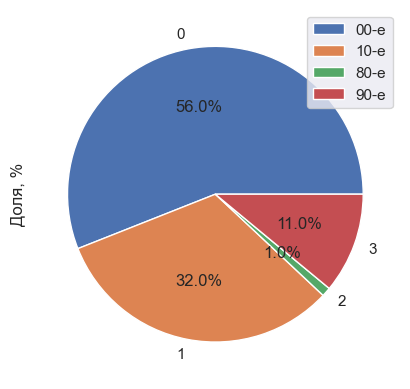

In [42]:
games_values.plot(y='Доля, %', kind='pie', autopct='%1.1f%%')
plt.legend(games_values['Года выпуска'])
plt.show()

### 3.2 Количество игр по платформам

In [43]:
games_platform = games.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.reset_index().rename(columns={'platform': 'Платформа', 'total_sales':'Продажи, млн. шт'})
games_platform['Доля, %'] = round(games_platform['Продажи, млн. шт'] / games_platform['Продажи, млн. шт'].sum(), 2) * 100
games_platform = games_platform.sort_values(by='Продажи, млн. шт', ascending=False).reset_index(drop=True)
games_platform

,Платформа,"Продажи, млн. шт","Доля, %"
0,PS2,1233.56,14.0
1,X360,961.24,11.0
2,PS3,931.33,11.0
3,Wii,891.18,10.0
4,DS,802.78,9.0
5,PS,727.58,8.0
6,PS4,314.14,4.0
7,GBA,312.88,4.0
8,PSP,289.53,3.0
9,3DS,257.81,3.0


Нам кажется, что для дальнейшего анализа пригодятся топ 10 платформ + PC. Сделаем заготовку для столбчатой диаграммы

In [44]:
top_platforms = games_platform[:11]
top_platforms_list = top_platforms['Платформа'].tolist()
top_platform_data = games.query('platform in @top_platforms_list')

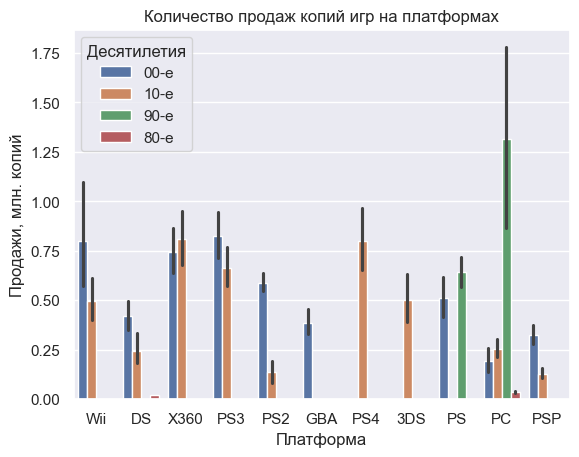

In [45]:
sns.barplot(data=top_platform_data, x="platform", y="total_sales", hue='decades')\
.set(xlabel = 'Платформа', ylabel = 'Продажи, млн. копий', title = 'Количество продаж копий игр на платформах')
plt.legend(title='Десятилетия')
plt.show()

По данному барплоту можно сказать, что новые приставки появлялись каждые лет 10. Если мы посмотрим на PC, то там за 90-е продаж больше всего - около 1.3 млн копий. Однако смотрим на все остальные приставки или платформы, и игр на них в 00-е продается больше, чем в 90-е (логично, если они появились позже), при этом на остальных приставках за тот же промежуток игр продается меньше (т.е. старые приставки технически устаревают и не тянут требования новых игр). Так что нам интересен период с начала 00-х.


Посмотрим, какие актуальные приставки были в 00-е и в 10-е и оценим их по продажам.

In [46]:
games_actual = games.query('decades == "00-е" or decades == "10-е"')

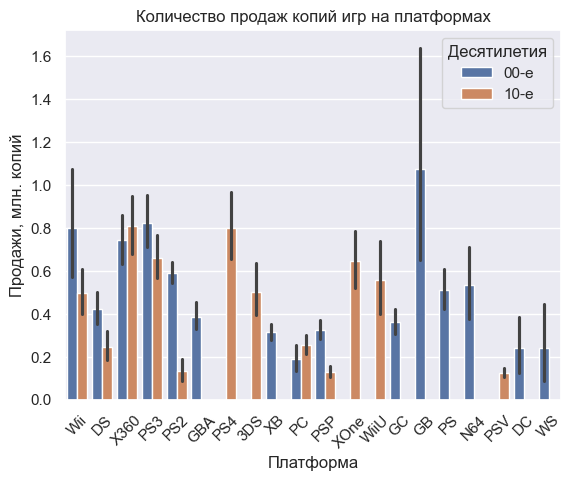

In [47]:
sns.barplot(data=games_actual, x="platform", y="total_sales", hue='decades')\
.set(xlabel = 'Платформа', ylabel = 'Продажи, млн. копий', title = 'Количество продаж копий игр на платформах')
plt.legend(title='Десятилетия')
plt.xticks(rotation=45)
plt.show()

In [48]:
games_actual_platform = games_actual.pivot_table(index='platform', columns='decades', values='total_sales', aggfunc='sum')\
.reset_index().rename(columns={'platform': 'Платформа'})
games_actual_platform.sort_values(by='00-е', ascending=False)

decades,Платформа,00-е,10-е
9,PS2,1227.47,6.09
2,DS,679.01,123.75
15,Wii,668.21,222.97
17,X360,410.83,550.41
10,PS3,343.60,587.73
4,GBA,312.88,NaN
18,XB,251.57,NaN
12,PSP,225.48,64.05
5,GC,196.73,NaN
8,PS,140.70,NaN


In [49]:
games_actual_platform.sort_values(by='10-е', ascending=False)

decades,Платформа,00-е,10-е
10,PS3,343.60,587.73
17,X360,410.83,550.41
11,PS4,NaN,314.14
0,3DS,NaN,257.81
15,Wii,668.21,222.97
19,XOne,NaN,159.32
2,DS,679.01,123.75
7,PC,83.76,121.96
16,WiiU,NaN,82.19
12,PSP,225.48,64.05


In [50]:
games_actual.pivot_table(index='decades', values='total_sales', aggfunc='sum')

,total_sales
decades,
00-е,4614.91
10-е,2544.23


Предлагаем также посмотреть как сильно сократились продажи по старым приставкам в новом десятилетии. Для этого разделим продажи в 10-х на продажи в нулевых.

In [51]:
games_actual_platform['Прирост, в %'] = (round(games_actual_platform['10-е'] / games_actual_platform['00-е'], 2) * 100) - 100
games_actual_platform

decades,Платформа,00-е,10-е,"Прирост, в %"
0,3DS,NaN,257.81,NaN
1,DC,7.41,NaN,NaN
2,DS,679.01,123.75,-82.0
3,GB,29.00,NaN,NaN
4,GBA,312.88,NaN,NaN
5,GC,196.73,NaN,NaN
6,N64,37.30,NaN,NaN
7,PC,83.76,121.96,46.0
8,PS,140.70,NaN,NaN
9,PS2,1227.47,6.09,-100.0


За период с 00 по 10-е появилось всего 5 приставок, но при этом в 10-х прекратились продажи по 8 старым приставкам. 
При этом на некоторых платформах в новом десятилетии сократились продажи, 
Таким образом, актуальный период можно оставить с 00 по 10-е, при этом сделать срез таблицы по тем платформам, которые не перестали продавать копии игр в 10-е, и при этом уровень падения продаж не меньше 40%

### 3.3 Актуальный период для анализа

In [52]:
# подготовим сводную таблицу для формирования актуального списка платформ - уберем строки с нулевыми продажами в 10-х
# и с отрицательным приростом
games_actual_platform = games_actual_platform.dropna(subset=['10-е'])
games_actual_platform['Прирост, в %'] = games_actual_platform['Прирост, в %'].fillna(0)
games_actual_platform = games_actual_platform[games_actual_platform['Прирост, в %'] >= -40]

C:\Users\anysh\AppData\Local\Temp\ipykernel_36044\579083555.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_actual_platform['Прирост, в %'] = games_actual_platform['Прирост, в %'].fillna(0)


In [53]:
# выведем, чтоб убедиться, что удалились нужные строки
games_actual_platform

decades,Платформа,00-е,10-е,"Прирост, в %"
0,3DS,NaN,257.81,0.0
7,PC,83.76,121.96,46.0
10,PS3,343.60,587.73,71.0
11,PS4,NaN,314.14,0.0
13,PSV,NaN,53.81,0.0
16,WiiU,NaN,82.19,0.0
17,X360,410.83,550.41,34.0
19,XOne,NaN,159.32,0.0


In [54]:
# создадим список платформ для среза новой таблицы
actual_platform_list = games_actual_platform['Платформа'].tolist()

In [55]:
games_good = games.query('year_of_release >= 2000 and platform in @actual_platform_list').reset_index(drop=True)
games_good.head(5)

C:\Users\anysh\AppData\Local\Temp\ipykernel_36044\330064256.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  games_good = games.query('year_of_release >= 2000 and platform in @actual_platform_list').reset_index(drop=True)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,age,total_sales,decades
0,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6,E,6+,21.82,10-е
1,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8,M,17+,21.05,10-е
2,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8,M,17+,16.27,10-е
3,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3,M,17+,14.73,10-е
4,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1,RP,рейтинг ожидается,14.63,10-е


Посмотрим на соотношение продаж в 00-е и 10-е. Если соотношение будет незначительное, то логично будет убрать из анализа продажи в 00-х - они потенциально могут не принести выручки.

In [56]:
games_1 = games_good.pivot_table(index='decades', values='total_sales', aggfunc='sum').reset_index()
games_1['Доля, %'] = round(games_1['total_sales'] / games_good['total_sales'].sum() * 100, 2)
games_1

,decades,total_sales,"Доля, %"
0,00-е,838.19,28.26
1,10-е,2127.37,71.74


28% - внушительно, однако следует учитывать, что индустрия видеоигр меняется, стоит ограничиться не просто десятилетием, а небольшим периодом от 3 до 5 лет в 2010-х.

In [57]:
games_good = games_good.query('year_of_release >= 2011')
games_good.head(5)

C:\Users\anysh\AppData\Local\Temp\ipykernel_36044\3245273921.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  games_good = games_good.query('year_of_release >= 2011')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,age,total_sales,decades
1,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8,M,17+,21.05,10-е
2,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8,M,17+,16.27,10-е
3,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3,M,17+,14.73,10-е
4,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1,RP,рейтинг ожидается,14.63,10-е
6,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1,RP,рейтинг ожидается,14.60,10-е


Мы подготовили таблицу по продажам для анализа - выбрали период с 2011 года, а также избавились от платформ, на которые перестали продавать копии игр начиная с 2010 года.

### 3.4 Выбор прибыльной платформы

Для того, чтобы выбрать прибыльные платформы еще раз сделаем сводную таблицу

In [58]:
games_good_sales = games_good.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.reset_index()\
.rename(columns={'platform':'Платформа', 'total_sales':'Продажи, млн коп.'})\
.sort_values(by='Продажи, млн коп.', ascending=False)
games_good_sales

,Платформа,"Продажи, млн коп."
2,PS3,445.56
6,X360,380.38
3,PS4,314.14
0,3DS,257.81
7,XOne,159.32
1,PC,97.68
5,WiiU,82.19
4,PSV,53.81


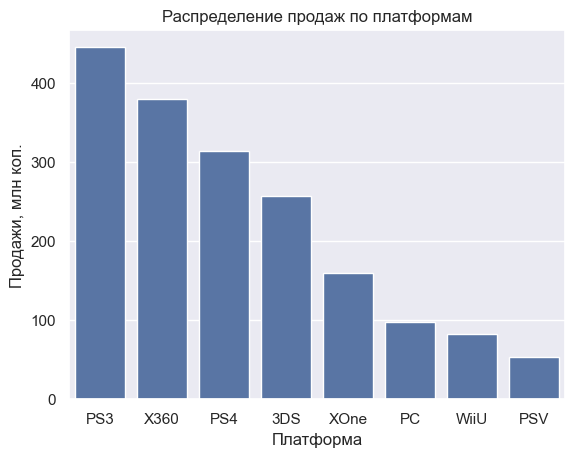

In [59]:
sns.barplot(data=games_good_sales, x='Платформа', y='Продажи, млн коп.')\
.set(title='Распределение продаж по платформам')
plt.show()

Для анализа продаж по платформам мы предлагаем взять все платформы (тут их меньше 10).

### 3.5 Оценка разброса продаж по выбранным платформам

На предыдущем шаге мы выбрали все платформы, которые входят в акутальный период, и сейчас мы построим по глобальным продажам диаграмму размаха - "ящик с усами".

Построим диаграммы размаха

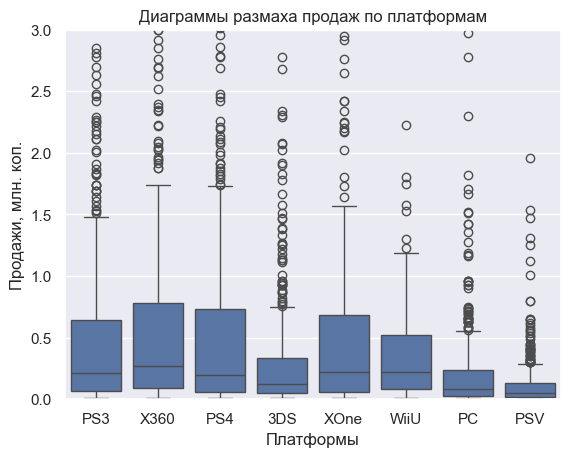

In [60]:
sns.boxplot(x='platform', y='total_sales', data=games_good)\
.set(ylim=(0, 3), xlabel='Платформы', ylabel='Продажи, млн. коп.', title='Диаграммы размаха продаж по платформам')
plt.show()

Пока что мы видим, что для всех приставок разные выбросы, начиная с 1.5 млн копий и заканчивая 0.25. С помощью функции describe посмотри на значения рамзаха и удалим выбросы

Минимальные и максимальные значения:
- Минимальные значения = (1.5 * IQR) - Q1 = 1.5 * (Q3-Q1) - Q1
- Максимальные значения = (1.5 * IQR) + Q3 = 1.5 * (Q3-Q1) + Q3

Используем цикл for() и выведем для каждой приставки статистические значения по размеру продаж, а также минимальные и максимальные значения диаграммы размаха

In [61]:
for platform in games_good['platform'].unique():
    q1 = games_good[games_good['platform'] == platform]['total_sales'].quantile(0.25)
    q3 = games_good[games_good['platform'] == platform]['total_sales'].quantile(0.75)
    min1 = q1 - 1.5 * (q3-q1)
    max1 = 1.5 * (q3-q1) + q3
    print(platform, "\n", games_good[games_good['platform'] == platform]['total_sales'].describe(), "\n", min1, max1)
    print()

PS3 
 count    707.000000
mean       0.630212
std        1.452228
min        0.010000
25%        0.070000
50%        0.210000
75%        0.640000
max       21.050000
Name: total_sales, dtype: float64 
 -0.7850000000000001 1.495

X360 
 count    498.000000
mean       0.763815
std        1.637090
min        0.010000
25%        0.090000
50%        0.270000
75%        0.780000
max       16.270000
Name: total_sales, dtype: float64 
 -0.9450000000000002 1.8150000000000002

PS4 
 count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64 
 -0.9449999999999998 1.7349999999999999

3DS 
 count    512.000000
mean       0.503535
std        1.441271
min        0.010000
25%        0.050000
50%        0.120000
75%        0.332500
max       14.600000
Name: total_sales, dtype: float64 
 -0.3737500000000001 0.7562500000000001

XOne 
 count    247.000000
mean       0.6450

In [62]:
games_good_1 = games_good.query('(platform =="PS3" and total_sales <= 1.490) or (platform =="X360" and total_sales <= 1.8) or (platform =="PS4" and total_sales <= 1.730) or (platform =="3DS" and total_sales <= 0.756) or (platform =="XOne" and total_sales <= 1.620) or (platform =="WiiU" and total_sales <= 1.190) or (platform =="PC" and total_sales <= 0.55) or (platform =="PSV" and total_sales <= 0.290)')

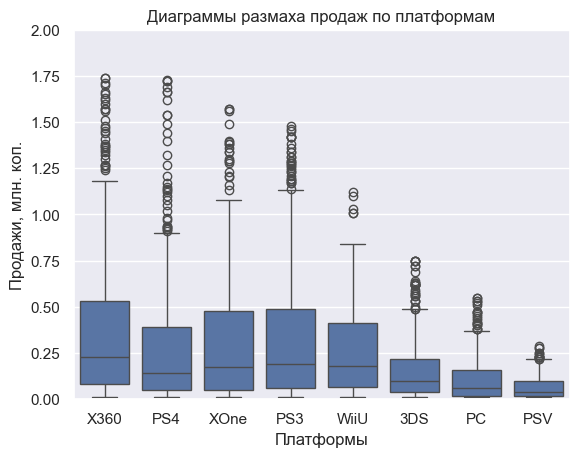

In [63]:
sns.boxplot(x='platform', y='total_sales', data=games_good_1)\
.set(ylim=(0, 2), xlabel='Платформы', ylabel='Продажи, млн. коп.', title='Диаграммы размаха продаж по платформам')
plt.show()

Выбросы все еще есть - удалим их поддбором

In [64]:
games_good_1 = games_good_1.query('(platform =="PS3" and total_sales <= 0.59) or \
(platform =="X360" and total_sales <= 0.65) or (platform =="PS4" and total_sales <= 0.41) or \
(platform =="3DS" and total_sales <= 0.3) or (platform =="XOne" and total_sales <= 0.74) or \
(platform =="WiiU" and total_sales <= 1) or (platform =="PC" and total_sales <= 0.23) or (platform =="PSV" and total_sales <= 0.19)')

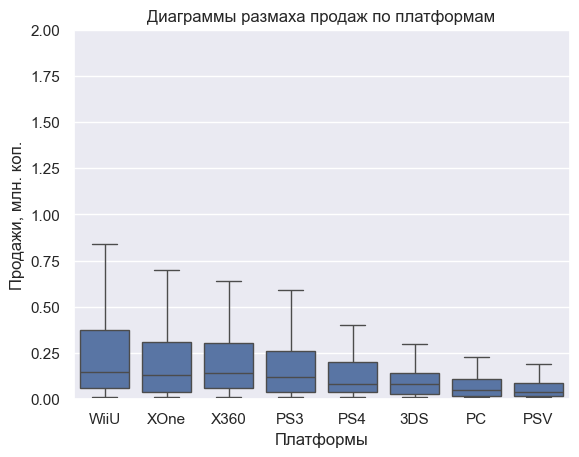

In [65]:
sns.boxplot(x='platform', y='total_sales', data=games_good_1)\
.set(ylim=(0, 2), xlabel='Платформы', ylabel='Продажи, млн. коп.', title='Диаграммы размаха продаж по платформам')
plt.show()

In [66]:
for platform in games_good_1['platform'].unique():
    q1 = games_good_1[games_good_1['platform'] == platform]['total_sales'].quantile(0.25)
    q3 = games_good_1[games_good_1['platform'] == platform]['total_sales'].quantile(0.75)
    min1 = q1 - 1.5 * (q3-q1)
    max1 = 1.5 * (q3-q1) + q3
    print(platform, "\n", games_good_1[games_good_1['platform'] == platform]['total_sales'].describe(), "\n", min1, max1)
    print()

WiiU 
 count    127.000000
mean       0.241969
std        0.224524
min        0.010000
25%        0.060000
50%        0.150000
75%        0.375000
max        0.840000
Name: total_sales, dtype: float64 
 -0.41250000000000003 0.8475

XOne 
 count    187.000000
mean       0.197594
std        0.195091
min        0.010000
25%        0.040000
50%        0.130000
75%        0.310000
max        0.700000
Name: total_sales, dtype: float64 
 -0.36500000000000016 0.7150000000000002

X360 
 count    355.000000
mean       0.198197
std        0.166400
min        0.010000
25%        0.060000
50%        0.140000
75%        0.305000
max        0.640000
Name: total_sales, dtype: float64 
 -0.30750000000000005 0.6725000000000001

PS3 
 count    517.000000
mean       0.173133
std        0.155787
min        0.010000
25%        0.040000
50%        0.120000
75%        0.260000
max        0.590000
Name: total_sales, dtype: float64 
 -0.29000000000000004 0.5900000000000001

PS4 
 count    259.000000
mean       

Таким образом:
- Для приставки WiiU размах составляет от 0.01 до 0.84 млн копий, среднее значение продаж составляет 0.24 млн копий
- Для приставки XOne размах составляет от 0.01 м до 0.70 млн копий, среднее значение продаж составляет 0.20 млн копий
- Для приставки X360 размах составляет от 0.01 до 0.64 млн копий, среднее значение продаж составляет 0.20 млн копий
- Для приставки PS3 размах составляет от 0.01 до 0.59 млн копий, среднее значение продаж составляет 0.17 млн копий
- Для приставки PS4 размах составляет от 0.01 до 0.40 млн копий, среднее значение продаж составляет 0.13 млн копий
- Для приставки 3DS размах составляет от 0.01 до 0.30 млн копий, среднее значение продаж составляет 0.10 млн копий
- Для PC размах составляет от 0.01 до 0.23 млн копий, среднее значение продаж составляет 0.07 млн копий
- Для приставки PSV размах составляет от 0.01 до 0.19 млн копий, среднее значение продаж составляет 0.05 млн копий

### 3.6 Влияние оценок критиков и игроков на количество продаж

#### 3.6.1 Влияние оценок критиков на количество продаж.

Посмотрим, как оценка критиков влияет на количество проданных копий для платформ. Для этого построим диаграмму рассеяния с помощью библиотеки seaborn, а также посмотрим на коэффициент корреляции.

Напомним: коэффициент корреляции Пирсона показывает, как одна переменная меняется в зависимости от другой.

In [67]:
# убираем заглушки и используем данные с актуальной информацией
games_good_critic = games_good.query('critic_score != -1')

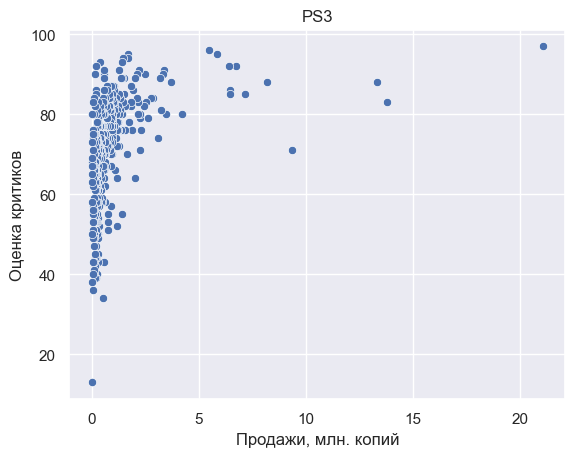

0.3819914330743234


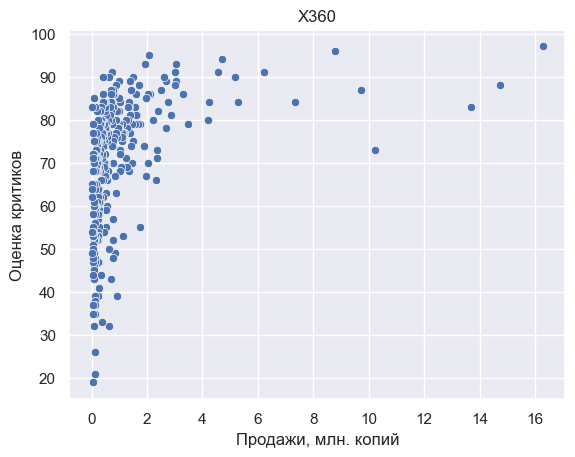

0.3912533245484558


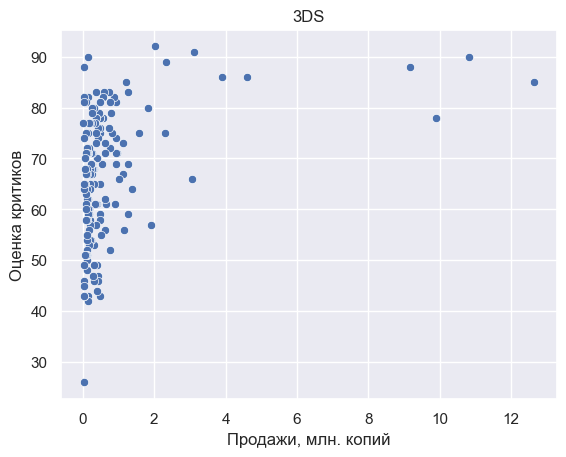

0.34873973059848346


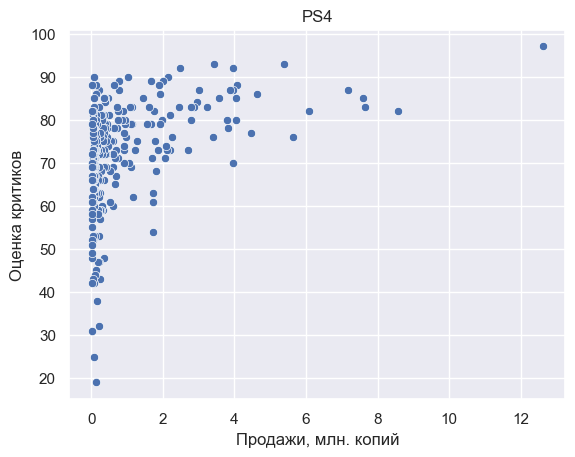

0.406567902061781


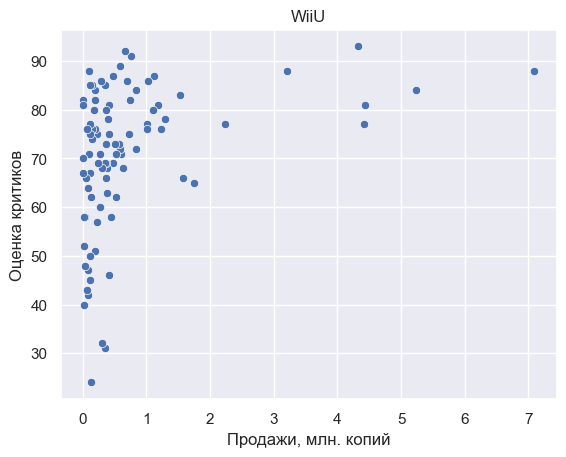

0.3483797601201749


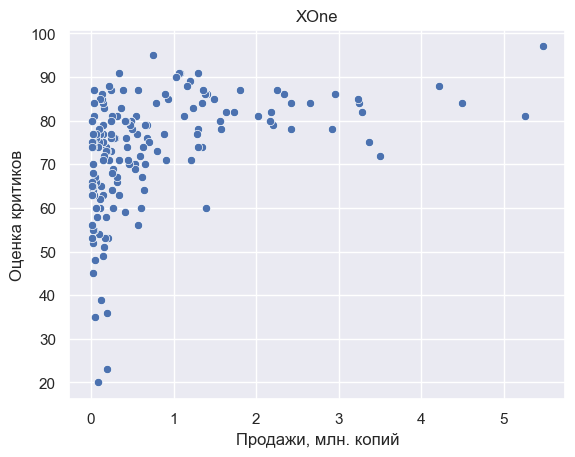

0.41699832800840175


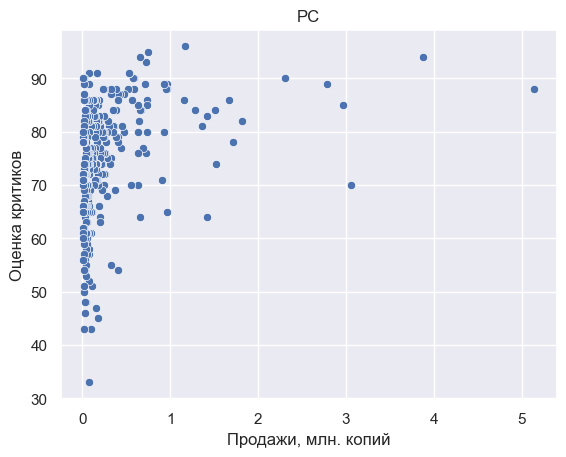

0.3141847396903631


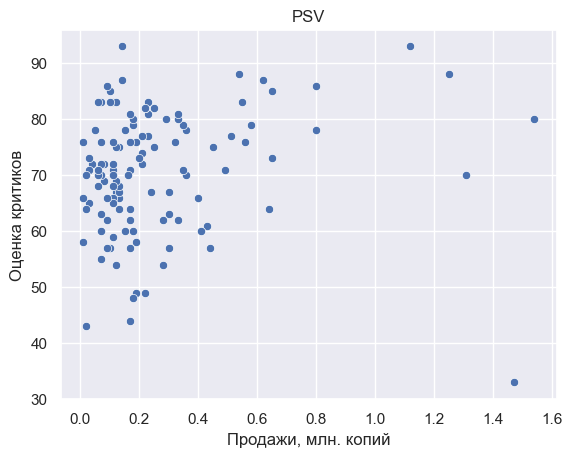

0.13176292727608935


In [68]:
# используем цикл for для вывода всех диаграмм и коэффиценитов корреляции под ними.
for platform in games_good_critic['platform'].unique():
    sns.scatterplot(x='total_sales', y='critic_score', data=games_good_critic[games_good_critic['platform'] == platform])\
    .set(xlabel='Продажи, млн. копий', ylabel='Оценка критиков', title = platform)
    plt.show()
    print(games_good_critic[games_good_critic['platform'] == platform]['total_sales'].corr(games_good_critic['critic_score']))

Таким образом:

**1. PS3:**

- мы видим скопления в районе продаж от 0 до 3 млн копий с оценкой от 40 до 85-90 от критиков. При этом коэффициент корреляции равен 0.38, что указывает на средне-слабую связь между оценкой критиков и продажами на данной платформе

**2. X360:**

- здесь скопления начинают образовываться от 0 до 2 млн копий с оценкой от 32 до 90 от критиков - чем выше оценка, тем больше скопление продаж. Коэффициент корреялции равен 0.39, что также указывает на средне-слабую связь между продажами и оценкой.

**3. 3DS:**

- скопление продаж от 0 до 1,5 млн копий, при этом оценка также варьируется от 42 до 85. Коэффициент корреляции равен 0.34, что свидетельствует о средне-слабой связи между переменными.

**4. PS4:**

- скопление продаж от 0 до 1 млн копий, при этом чаще встречаются оценки от 40 до 90. Наибольшее скопление в районе оценок от 65 до 83. Коэффициент корреляции равен 0.40, что говорит о средне-слабой связи.

**5. WiiU:**

- небольшое скопление наблюдаем на диаграмме в районе продаж от 0.1 до 1 млн. копий с оценкой от критиков 60-80. Коэффициент корреляции равен 0.35 - средне слабая связь

**6. XOne:**

- скопление на диаграмме в районе продаж от 0.1 до 1 млн. копий с оценкой от критиков 50-85. Коэффициент корреляции равен 0.31  средне слабая связь

**7. PC:**

- скопление на диаграмме в районе продаж от 0.1 до 0.5 млн. копий с оценкой от критиков 55-95. Коэффициент корреляции равен 0.41 - средне слабая связь

**8. PSV:**

- очень рассеянная диаграмма, небольшое нечеткое скопление в районе продаж от 0.1 до 0.2 млн. копий с оценкой от критиков 60-75. Коэффициент корреляции равен 0.13, что указывает на очень слабую связь между переменными.

#### 3.6.2 Влияние оценок игроков на количество продаж

In [69]:
games_good_user = games_good.query('user_score != -1')

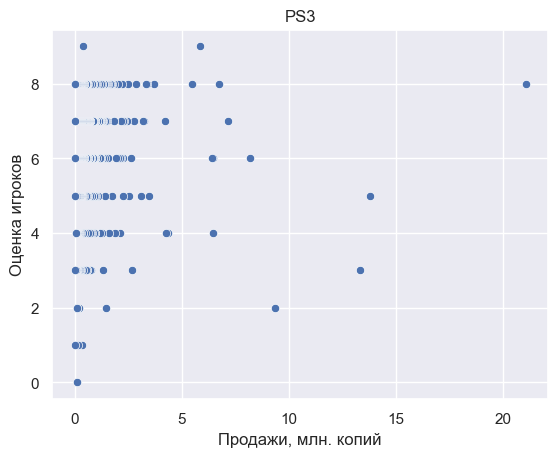

0.011641004479001939


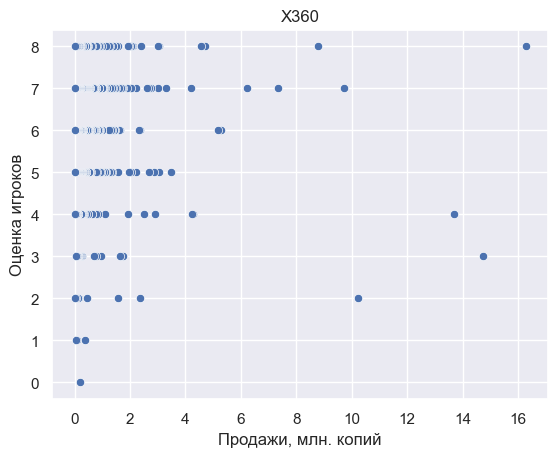

0.029666518041770444


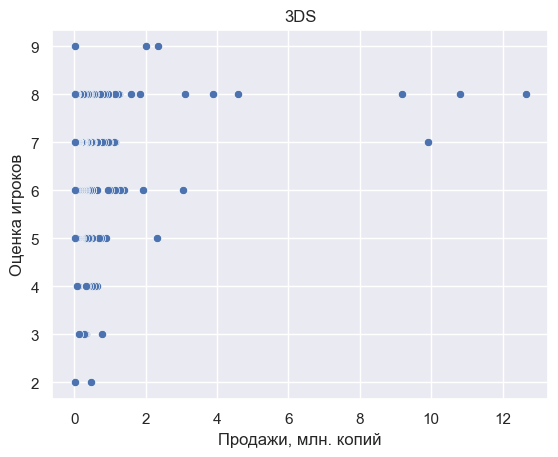

0.22939440821288484


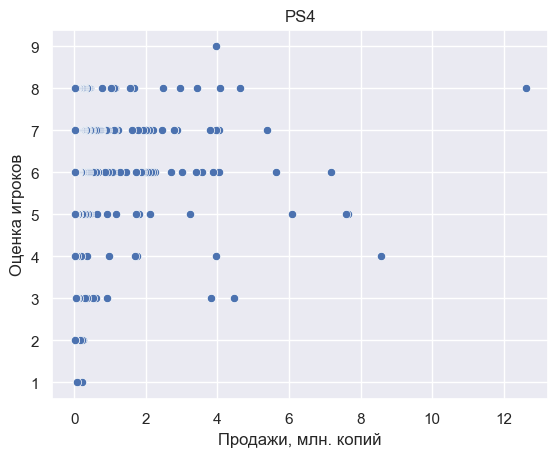

-0.027033058622341115


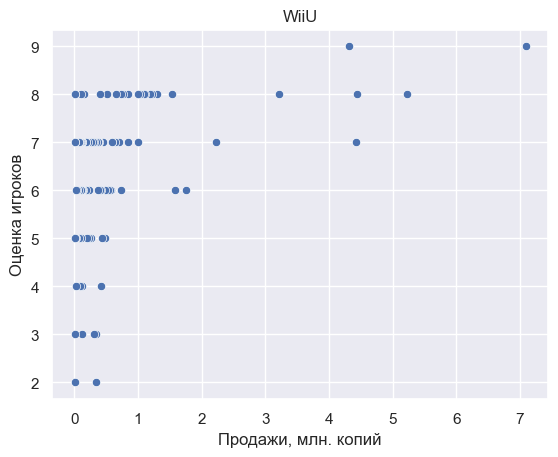

0.4010144324037836


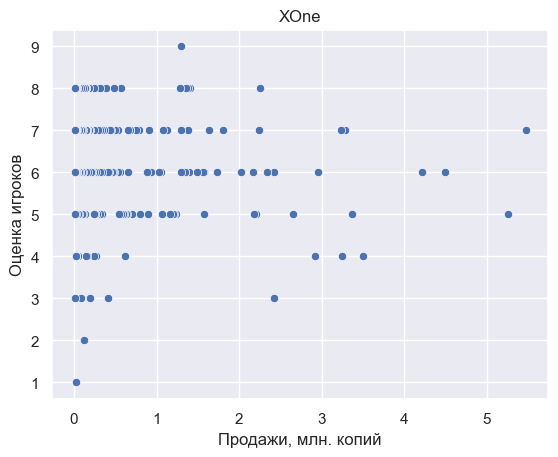

-0.08248274844768903


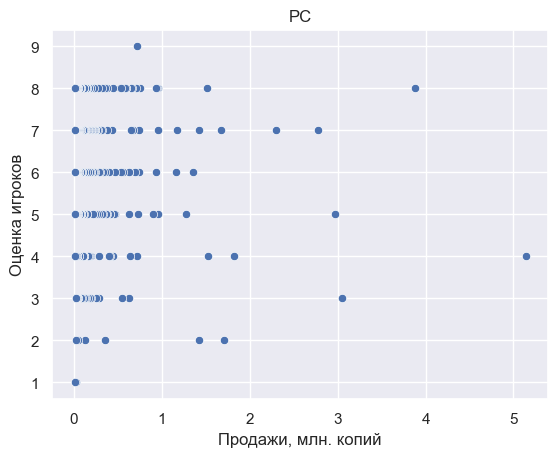

-0.04216812216039902


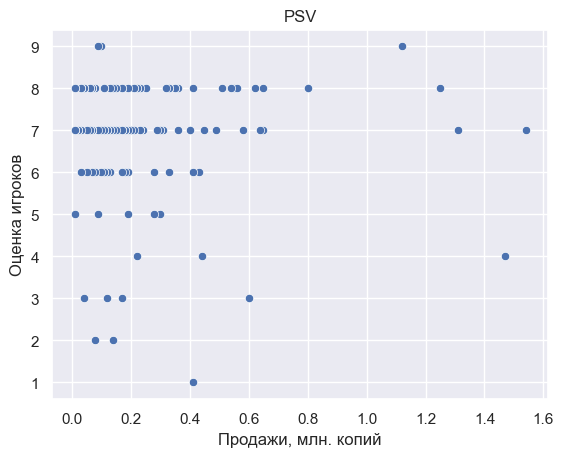

0.007664330447270624


In [70]:
for platform in games_good_user['platform'].unique():
    sns.scatterplot(x='total_sales', y='user_score', data=games_good_user[games_good_user['platform'] == platform])\
    .set(xlabel='Продажи, млн. копий', ylabel='Оценка игроков', title = platform)
    plt.show()
    print(games_good_user[games_good_user['platform'] == platform]['total_sales'].corr(games_good_user['user_score']))

Таким образом:

**1. PS3:**

- мы видим скопления в районе продаж от 0 до 5 млн копий с оценкой от 4 до 8 от игроков. При этом коэффициент корреляции равен 0.01, что указывает на очень слабую связь между оценкой игроков и продажами на данной платформе

**2. X360:**

- здесь скопления начинают образовываться от 0 до 2 млн копий с оценкой от 5 до 8 - причем чаще скопление продаж на оценке 7. Коэффициент корреялции равен 0.03, что также указывает на очень слабую связь между продажами и оценкой.

**3. 3DS:**

- скопление продаж от 0 до 1,8 млн копий, при этом оценка с наибольшей кучностью - 8. Коэффициент корреляции равен 0.23, что свидетельствует о средне-слабой связи между переменными.

**4. PS4:**

- скопление продаж от 0 до 3 млн копий, при этом чаще встречаются оценки 6 и 7. Коэффициент корреляции равен -0.03, что говорит о средне-слабой противоположной связи (продажи изменяются противоположно изменению оценок от игроков).

**5. WiiU:**

- небольшое скопление наблюдаем на диаграмме в районе продаж от 0.1 до 1.1 млн. копий с оценкой от игроков 8. Коэффициент корреляции равен 0.40 - средне слабая связь

**6. XOne:**

- скопление на диаграмме в районе продаж от 0.1 до 1.5 млн. копий с оценкой от игроков 5, 6, 7. Коэффициент корреляции равен -0.08 - очень слабая противоположная связь.

**7. PC:**

- скопление на диаграмме в районе продаж от 0.1 до 0.8 млн. копий с оценкой от критиков 8. Коэффициент корреляции равен -0.04 - очень слабая противоположная связь.

**8. PSV:**

- скопление в районе продаж от 0.1 до 0.2 млн. копий с оценкой от игроков 7, 8. Коэффициент корреляции равен 0.007, что указывает на очень слабую связь между переменными.

### 3.7 Распределение игр по жанрам

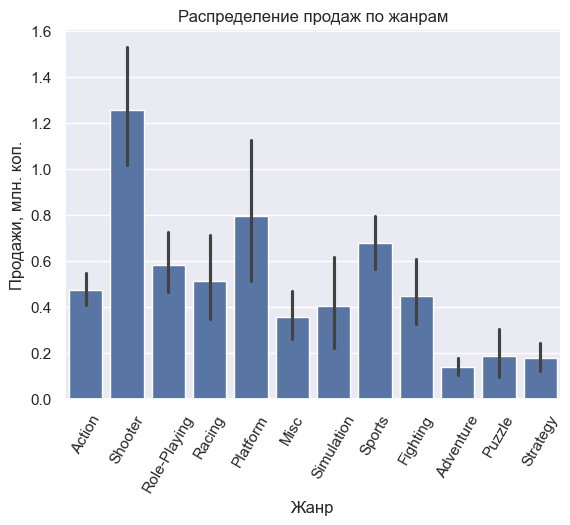

In [71]:
sns.barplot(data=games_good, x='genre', y='total_sales')\
.set(xlabel='Жанр', ylabel='Продажи, млн. коп.', title='Распределение продаж по жанрам')
plt.xticks(rotation=60)
plt.show()

На данной диаграмме можно увидеть, что жанр с самыми низкими продажами на платфрормах:
- жанр Adventure, с общим объемом 0.17 млн. копий, 

а самые продаваемые жанры: 
- Sports - 0.7 млн.копий;
- Platform - 0.8 млн.копий;
- Shooter - 1.22 млн.копий.

## Шаг 4. Портрет пользователя каждого региона

В нашем распоряжении имеются данные о трез регионах - NA, EU, JP. Нам предстоит выявить:
- топ 5 популярных платформ по продажам
- топ 5 самых популярных жанров
- влияние рейтинга ESRB на продажи в каждом регионе

Напомним классификацию рейтинга ESRB:

- **«EC» («Early childhood»)** — «Для детей младшего возраста». Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими.
- **«E» («Everyone»)** — «Для всех». Содержание вполне подходит для всех возрастов (ранее с 6 лет). Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. 
- **«E10+» («Everyone 10 and older»)** — «Для всех от 10 лет и старше». Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. 
- **«T» («Teen»)** — «Подросткам». Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики. 
- **«M» («Mature»)** — «Для взрослых». Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику. 
- **«AO» («Adults Only 18+»)** — «Только для взрослых». Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое. 
- **«RP» («Rating Pending»)** — «Рейтинг ожидается». Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу. 

### 4.1 Регион NA - North America

Возьмем исходную таблицу games_good и сделаем срез по региону.

In [72]:
games_na = games_good.drop(['eu_sales', 'jp_sales', 'other_sales', 'total_sales', 'decades'], axis=1)

In [73]:
games_na_table = games_na.pivot_table(index='platform', values='na_sales', aggfunc='sum').reset_index()\
.rename(columns={'platform':'Платформа', 'na_sales':'Продажи, млн. копий'})
games_na_table['Доля продаж, %'] = round(games_na_table['Продажи, млн. копий'] / games_na['na_sales'].sum() * 100, 2)
games_na_table = games_na_table.sort_values(by='Продажи, млн. копий', ascending=False).reset_index(drop=True)
games_na_table[0:5]

,Платформа,"Продажи, млн. копий","Доля продаж, %"
0,X360,226.80,29.84
1,PS3,168.26,22.14
2,PS4,108.74,14.31
3,XOne,93.12,12.25
4,3DS,82.65,10.87


Рейтинг топ-5 платформ в Северной Америке по продажам (млн. копий):
1. X360 - 226.80 - 29.84%
2. PS3 - 168.26 - 22.14%
3. PS4 - 108.74 - 14.31%
4. XOne - 93.12 - 12.25%
5. Nintendo 3DS - 82.65 - 10.87%

Две приставки принадлежат Sony, две - Microsoft, и одна - Nintendo. 

In [74]:
games_na_table = games_na.pivot_table(index='genre', values='na_sales', aggfunc='sum').reset_index()\
.rename(columns={'genre':'Жанр', 'na_sales':'Продажи, млн. копий'})
games_na_table['Доля продаж, %'] = round(games_na_table['Продажи, млн. копий'] / games_na['na_sales'].sum() * 100, 2)
games_na_table = games_na_table.sort_values(by='Продажи, млн. копий', ascending=False).reset_index(drop=True)
games_na_table[0:5]

,Жанр,"Продажи, млн. копий","Доля продаж, %"
0,Action,211.66,27.85
1,Shooter,193.27,25.43
2,Sports,101.27,13.32
3,Role-Playing,79.38,10.44
4,Misc,43.97,5.79


Топ жанров по продажам в Северной Америке:
1. Action - 211.66 - 27.85%
2. Shooter - 193.27 - 25.43%
3. Sports - 101.27 - 13.32%
4. Role-Playing - 79.38 - 10.44%
5. Misc - 43.97 - 5.79%

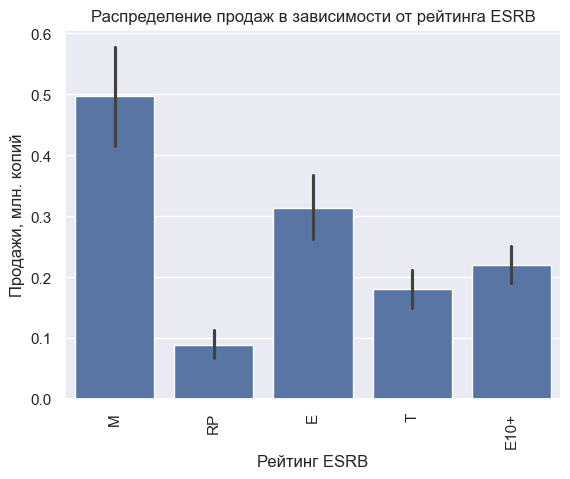

In [75]:
sns.barplot(data=games_na, x='rating', y='na_sales')\
.set(xlabel='Рейтинг ESRB', ylabel='Продажи, млн. копий', title='Распределение продаж в зависимости от рейтинга ESRB')
plt.xticks(rotation=90)
plt.show()

Согласно рейтингу ESRB самое большое количество проданных копий относится к играм рейтинга M - Mature "Для взрослых" - продано целых 0.5 млн копий. На втором месте Е - Everyone "Для всех" - 0.3 млн копий.
Можно сказать, что целевая аудитория Северной Америки - это подростки от 17 лет.

### 4.2 Регион EU - Europian Union

In [76]:
games_eu = games_na = games_good.drop(['na_sales', 'jp_sales', 'other_sales', 'total_sales', 'decades'], axis=1)

In [77]:
games_eu_table = games_eu.pivot_table(index='platform', values='eu_sales', aggfunc='sum').reset_index()\
.rename(columns={'platform':'Платформа', 'eu_sales':'Продажи, млн. копий'})
games_eu_table['Доля продаж, %'] = round(games_eu_table['Продажи, млн. копий'] / games_eu['eu_sales'].sum() * 100, 2)
games_eu_table = games_eu_table.sort_values(by='Продажи, млн. копий', ascending=False).reset_index(drop=True)
games_eu_table[0:5]

,Платформа,"Продажи, млн. копий","Доля продаж, %"
0,PS3,163.09,25.93
1,PS4,141.09,22.43
2,X360,117.10,18.62
3,3DS,61.27,9.74
4,PC,56.70,9.01


Рейтинг топ-5 платформ в Европе по продажам (млн. копий):
1. PS3 - 163.09 - 25.93%
2. PS4 - 141.09 - 26.59%
3. X360 - 117.10 - 13.98%
4. Nintendo 3DS - 61.27 - 12.03%
5. PC - 56.70 - 6.07%

В данном рейтинге уже появилась новая платформа - PC - персональный компьютер. Первое и третье место разделяет компания Sony, на втором - Microsoft, на 5-м - вновь Nintendo.

In [78]:
games_eu_table = games_eu.pivot_table(index='genre', values='eu_sales', aggfunc='sum').reset_index()\
.rename(columns={'genre':'Жанр', 'eu_sales':'Продажи, млн. копий'})
games_eu_table['Доля продаж, %'] = round(games_eu_table['Продажи, млн. копий'] / games_eu['eu_sales'].sum() * 100, 2)
games_eu_table = games_eu_table.sort_values(by='Продажи, млн. копий', ascending=False).reset_index(drop=True)
games_eu_table[0:5]

,Жанр,"Продажи, млн. копий","Доля продаж, %"
0,Action,187.45,29.80
1,Shooter,147.74,23.49
2,Sports,82.92,13.18
3,Role-Playing,60.12,9.56
4,Racing,39.58,6.29


Топ жанров по продажам в Европе:
1. Action - 187.45 - 29.80%
2. Shooter - 147.74 - 23.49%
3. Sports - 82.92 - 13.18%
4. Role-Playing - 60.12 - 9.56%
5. Racing - 39.58 - 6.29%

Почти похоже на предыдущий рейтинг, однако последнее место занимают не мультижанровые игры, а гоночки - можно понять))

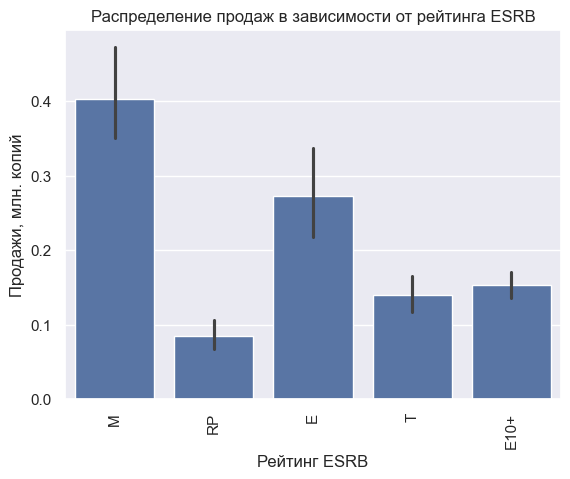

In [79]:
sns.barplot(data=games_eu, x='rating', y='eu_sales')\
.set(xlabel='Рейтинг ESRB', ylabel='Продажи, млн. копий', title='Распределение продаж в зависимости от рейтинга ESRB')
plt.xticks(rotation=90)
plt.show()

И как в Северной Америке, в Европе преобладают продажи игр с рейтингом M - Mature "Для взрослых" - 17+ - около 0.4 млн копий. На втором месте - Everyone "Для всех".

Тоже можно сказать, что целевая аудитория Европы - люди от 17 лет и люди разных возрастов.

### 4.3 Регион JP - Japan

In [80]:
games_jp =  games_good.drop(['na_sales', 'eu_sales', 'other_sales', 'total_sales', 'decades'], axis=1)

In [81]:
games_jp_table = games_jp.pivot_table(index='platform', values='jp_sales', aggfunc='sum').reset_index()\
.rename(columns={'platform':'Платформа', 'jp_sales':'Продажи, млн. копий'})
games_jp_table['Доля продаж, %'] = round(games_jp_table['Продажи, млн. копий'] / games_jp['jp_sales'].sum() * 100, 2)
games_jp_table = games_jp_table.sort_values(by='Продажи, млн. копий', ascending=False).reset_index(drop=True)
games_jp_table
games_jp_table[0:5]

,Платформа,"Продажи, млн. копий","Доля продаж, %"
0,3DS,100.62,49.20
1,PS3,49.39,24.15
2,PSV,21.84,10.68
3,PS4,15.96,7.80
4,WiiU,13.01,6.36


А вот здесь уже интересней. В Японии в приставки XboX и на персональных компьютерах практически не играют, а педпочитают отечественное производство)))

Рейтинг топ-5 платформ в Японии по продажам (млн. копий):
1. Nintendo 3DS - 100.62 - 49.20%
2. PS3 - 49.39 - 24.15%
3. PSV - 21.84 - 10.68%
4. PS4 - 15.96 - 7.80%
5. Nintendo WiiU - 13.01 - 6.36%

In [82]:
games_jp_table = games_jp.pivot_table(index='genre', values='jp_sales', aggfunc='sum').reset_index()\
.rename(columns={'genre':'Жанр', 'jp_sales':'Продажи, млн. копий'})
games_jp_table['Доля продаж, %'] = round(games_jp_table['Продажи, млн. копий'] / games_jp['jp_sales'].sum() * 100, 2)
games_jp_table = games_jp_table.sort_values(by='Продажи, млн. копий', ascending=False).reset_index(drop=True)
games_jp_table[0:5]

,Жанр,"Продажи, млн. копий","Доля продаж, %"
0,Role-Playing,65.13,31.85
1,Action,56.44,27.60
2,Misc,11.97,5.85
3,Shooter,11.92,5.83
4,Simulation,11.38,5.56


И здесь без сюпризов не обошлось, на пьедестал по жанрам японцы ставят Role-Playing.

Звучит как база - есть стереотип, что японцы хоть и приверженцы трудоголизма, также нелюдимы, как и русские, и очень любят различного рода новеллы, в которых можно ощутить себя главным героем и принимать важные решения... Не будем о грустном.

Топ жанров по продажам в Японии:
1. Role-Playing - 65.13 - 31.85%
2. Action - 56.44 - 27.60%
3. Misc - 11.97 - 5.85%
4. Shooter - 11.92 - 5.83%
5. Simulation - 11.38 - 5.56%

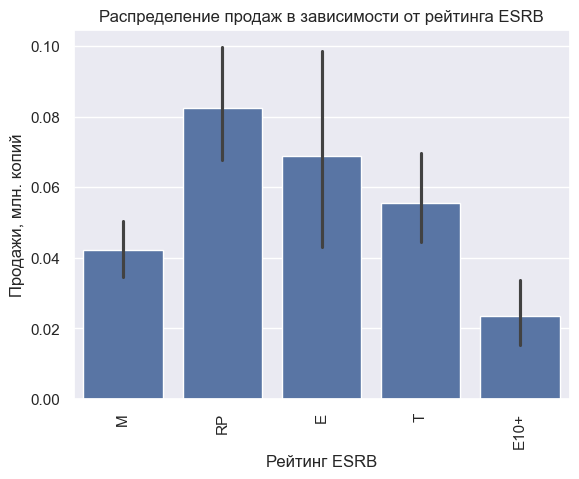

In [83]:
sns.barplot(data=games_jp, x='rating', y='jp_sales')\
.set(xlabel='Рейтинг ESRB', ylabel='Продажи, млн. копий', title='Распределение продаж в зависимости от рейтинга ESRB')
plt.xticks(rotation=90)
plt.show()

А вот здесь уже очень много игр с рейтингом RP - Rating Pending "Рейтинг ожидается".

Это может быть связано с тем, что в Японии сертификацией возрастного рейтинга игр в основном занимается другая компания -  Computer Entertainment Rating Organization (CERO):

- A (All Ages) — для всех возрастов;
- B (Ages 12 and up) — от 12 лет и старше;
- C (Ages 15 and up) — от 15 лет и старше;
- D (Ages 17 and up) — от 17 лет и старше;
- Z (Ages 18 and up) — только для взрослых.

Поэтому точно сказать, какая целевая аудитория в Японии - трудно, но зато мы знаем, что за все время там продалось около 0.046 млн копий игр в рейтинге "Для всех", 0.04 и 0.038 млн копий в рейтингах "Для взрослых" 17+ и "Подросткам" 13+ соотвественно.

## Шаг 5. Проверка гипотез

### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

При проверке данной гипотезы мы должны: 
- установить нулевую и альтернативную гипотезу, 
- использовать таблицу games_good, т.к нам нужен только актуальный период
- установить пороговое значение alpha (0.05 или 0.01)
- использовать аргумент equal_var=False,  т.к. не уверены, что дисперсии у выборок могут быть равны.

- Ho: средний рейтинг игроков Xbox One равен среднему рейтингу игроков PC;
- H1: средние рейтинги не равны друг другу.

В данном случае мы будем использовать двусторонний т-тест для двух независимых выборок, используя метод ttest-ind

In [84]:
# подготовили выборки по пользовательским оценкам
sample_XOne = games_good[games_good['platform'] == 'XOne']
sample_XOne = sample_XOne.query('user_score != -1')
sample_XOne = sample_XOne['user_score']

sample_PC = games_good[games_good['platform'] == 'PC']
sample_PC = sample_PC.query('user_score != -1')
sample_PC = sample_PC['user_score']

In [85]:
f'среднее совокупности  оценок XOne: {np.mean(sample_XOne)}'

'среднее совокупности  оценок XOne: 6.1098901098901095'

In [86]:
f'среднее совокупности  оценок PC: {np.mean(sample_PC)}'

'среднее совокупности  оценок PC: 5.98371335504886'

In [87]:
alpha = 0.05 # ставим 0.05, поскольку у нас двусторонняя гипотеза, расширим насколько возможно вероятность попадания в интервал
results = st.ttest_ind(
sample_XOne,
sample_PC, equal_var=False)
'p-значение:', results.pvalue

('p-значение:', 0.35987294572150186)

In [88]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергнуть нулевую гипотезу не получится')

Отвергнуть нулевую гипотезу не получится


Даже если мы поставим alpha = 0.01, то отвергнуть нулевую гипотезу не получится - мы не можем полагать, что пользовательские оценки двух платформ не равны.

### 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

В данном случае гипотезы выглядят следующим образом:

- H0 - средние пользовательские рейтинги двух жанров равны
- H1 - средние пользовательские рейтинги двух жанров не равны

Нам также необходимо будет использовать двусторонний т-тест с двумя независимыми выборками.

In [89]:
sample_action = games_good[games_good['genre'] == 'Action']
sample_action = sample_action.query('user_score != -1')
sample_action = sample_action['user_score']

sample_sports = games_good[games_good['genre'] == 'Sports']
sample_sports = sample_sports.query('user_score != -1')
sample_sports = sample_sports['user_score']

In [90]:
f'среднее совокупности  оценок жанра action: {np.mean(sample_action)}'

'среднее совокупности  оценок жанра action: 6.342271293375394'

In [91]:
f'среднее совокупности  оценок жанра Sports: {np.mean(sample_sports)}'

'среднее совокупности  оценок жанра Sports: 5.1695652173913045'

In [92]:
alpha = 0.05 # ставим 0.05, поскольку у нас двусторонняя гипотеза, расширим насколько возможно вероятность попадания в интервал
results = st.ttest_ind(
sample_action,
sample_sports, equal_var=False)
'p-значение:', results.pvalue

('p-значение:', 1.347842907289002e-18)

In [93]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергнуть нулевую гипотезу не получится')

Отвергаем нулевую гипотезу


Т-тест показал, что нам необходимо отвергнуть нулевую гипотезу в пользу альтернативной - средние значения пользовательских оценок для двух жанров не равны.

## Шаг 6. Выводы

### 6.1 Загрузка и предобработка данных

В рамках предобработки данных мы выполнили следующие действия:
1. Изменили наименования столбцов - привели их в нижний регистр
2. Преобразовали типы данных - столбцы ```year_of_release``` и ```critic_score``` привели к типу ```int```. В столбце ```user_score``` обнаружили значение ```tbd``` - приняли данное значение за пропуск и заменили на отрицательное значение ```-1```, чтобы не смещать среднее и медиану. Пришли к выводу, что такое обозначение может быть связано с возрастным рейтингом - преимущественно данная пометка стояла напротив игр с рейтингом от 6 до 13 лет (см. таблицу ниже). Общая доля таких пометок среди общего количества данных составила **32%**, поэтому удалить данные строки не представлялось возможным.

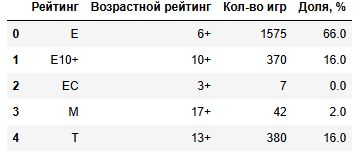

3. Обработали пропуски:
    - в столбцах ```name``` и ```year_of_release``` (1.68% от общего числа данных - не критично) удалили пропуски
    - в столбцах ```critic_score```, ```user_score``` - заменили пропуски на ```-1```, по аналогии с ```tbd```, **51.46%**, **40.17%** пропусков от общего числа данных соотвественно
    - в столбце ```rating``` заменили пропуски на ```RP``` - рейтинг ожидается - всего было **40.60%** пропусков от общего числа данных
4. Собрали столбец с общим числом выручки по континентам.

### 6.2 Исследовательский анализ

**1. Количество игр по годам**

Мы решили использовать категоризацию по десятилетиям, чтобы читабельно отобразить колчисетво уникальных игр.

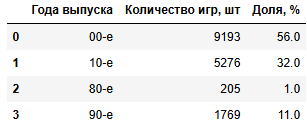

Такая компактная и удобная табличка показывает нам, что в 80-е годы вышло всего 205 игр, в 90-е - уже 1769, на нулевые пришелся пик игровой индустрии - 9193 игры, и к 10-м годам мы видим падение активности и выпуск игр составил всего 5276 игр.
Так что по-хорошему нам не важно, какое количество игр выходило до 2000 года, потому что:

1. В 80-е игр было очень мало - всего 1% от общего числа игр за все время.
2. в 90-е игр было уже больше - 11% от общего числа игр, тем не менее, игры, которые выпускались в 90-е и раньше уступают по качесту, меняются тренды на жанр и события в играх, поэтому логичней брать данные за последнее десятилетие, чтобы сравнивать игры в одинаковых условиях: по конкурентности рынка, жанровым предпочтениям и т.д.

**2. Количество игр по платформам, в продажах** + **Актуальный период для анализа**

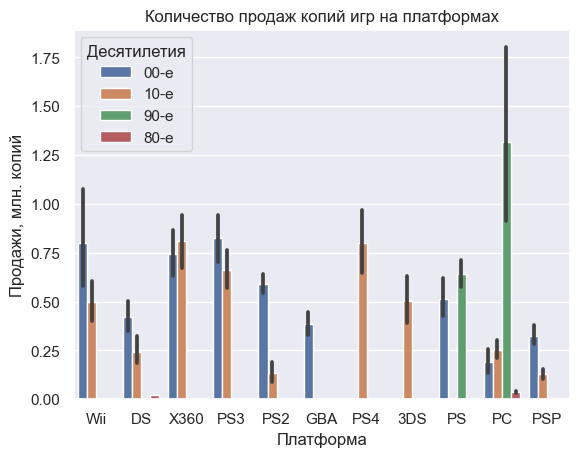

По данному барплоту можно сказать, что новые приставки появлялись **каждые лет 10**. Если мы посмотрим на PC, то там за 90-е продаж больше всего - около **1.3** млн копий. Однако смотрим на все остальные приставки или платформы, и игр на них в 00-е продается больше, чем в 90-е (логично, если они появились позже), при этом на остальных приставках за тот же промежуток игр продается меньше (т.е. старые приставки технически устаревают и не тянут требования новых игр). **Так что нам интересен период с начала 00-х.**

Далее мы провели анализ платформ по продажам в период с нулевых и до 2010-х. Главным критерием были продажи, а точнее - прирост прирост продаж больше 40% в 2010-х относительно нулевых. Ниже представлена таблица с продажам по платформам до применения критерия:

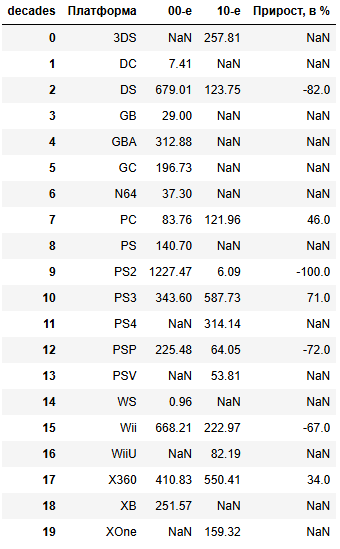

И после:

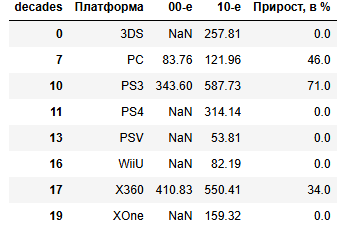

За период с 00 по 10-е появилось всего 5 приставок, но при этом в 10-х прекратились продажи по 8 старым приставкам. 
При этом на некоторых платформах в новом десятилетии сократились продажи.

Учитывая, что иргровая индустрия очень быстро развивается, мы решили оставить период для анализа от 2011 года (т.е. последние 5 лет)

**3. Выбор прибыльной платформы**

Мы сделали необходимый срез данных по платформам и годам, сделали сводную таблицу и вывели долю по продажам для того, чтобы определить наиболее прибыльные платформы.

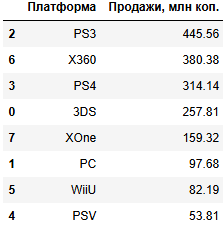

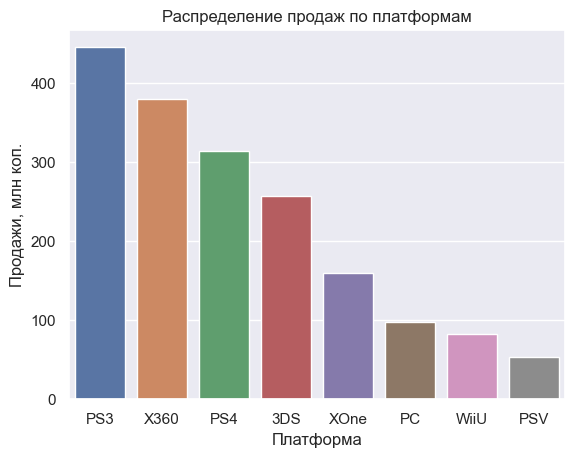

Для анализа мы решили взять все представленные платформы.

**4. Оценка разброса продаж по выбранным платформам, оценка выбросов.**

Мы построили Диаграммы размаха по продажам для каждой выбранной платформы, обработали выбросы, и выяснили следующую информацию:
- Для приставки WiiU размах составляет от 0.01 до 0.84 млн копий, среднее значение продаж составляет 0.24 млн копий
- Для приставки XOne размах составляет от 0.01 м до 0.70 млн копий, среднее значение продаж составляет 0.20 млн копий
- Для приставки X360 размах составляет от 0.01 до 0.64 млн копий, среднее значение продаж составляет 0.20 млн копий
- Для приставки PS3 размах составляет от 0.01 до 0.59 млн копий, среднее значение продаж составляет 0.17 млн копий
- Для приставки PS4 размах составляет от 0.01 до 0.40 млн копий, среднее значение продаж составляет 0.13 млн копий
- Для приставки 3DS размах составляет от 0.01 до 0.30 млн копий, среднее значение продаж составляет 0.10 млн копий
- Для PC размах составляет от 0.01 до 0.23 млн копий, среднее значение продаж составляет 0.07 млн копий
- Для приставки PSV размах составляет от 0.01 до 0.19 млн копий, среднее значение продаж составляет 0.05 млн копий

**5. Влияние оценок критиков и игроков на продажи по выбранным платформам**

Для влияния оценок мы построли диаграммы рассяения для каждой выбранной платформы и посчитали коэффициент Пирсона.

**Для оценок критиков:**

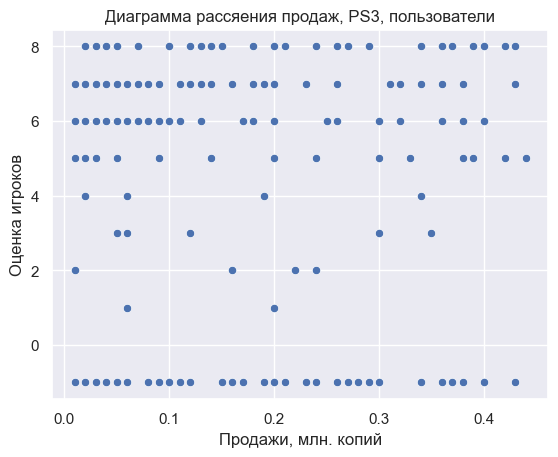

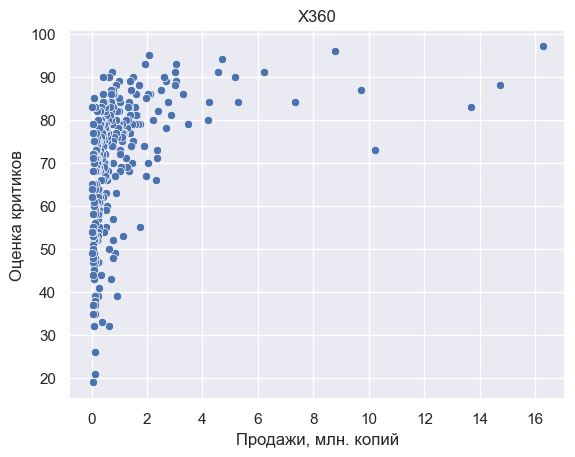

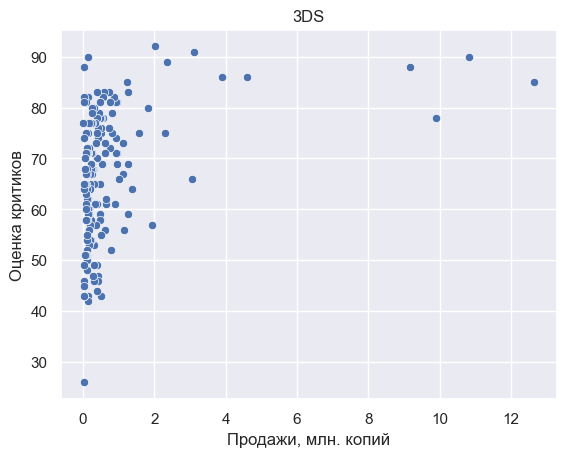

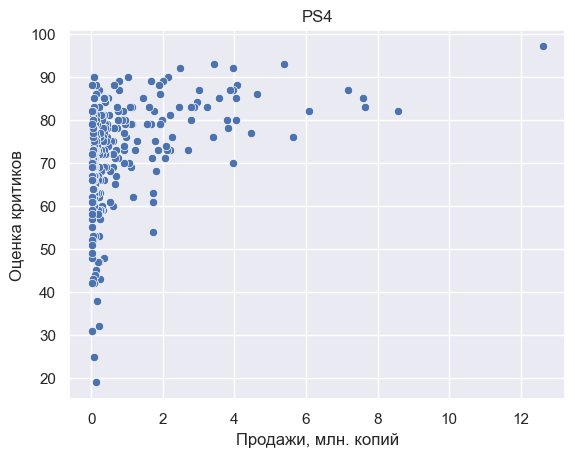

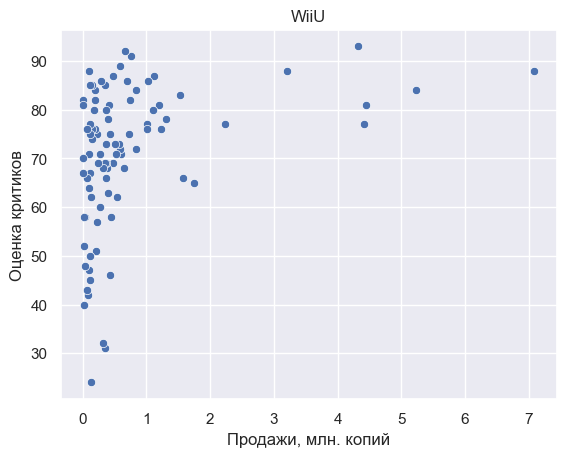

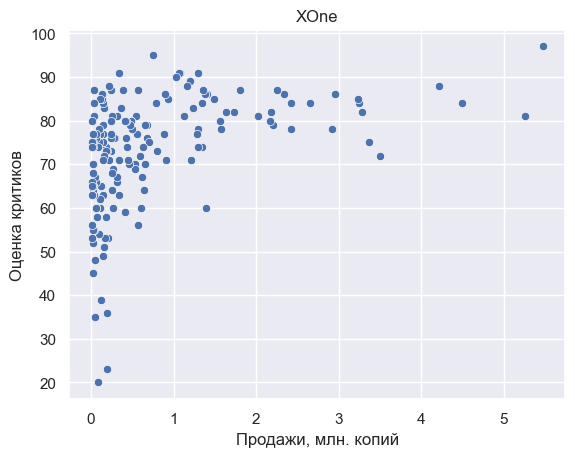

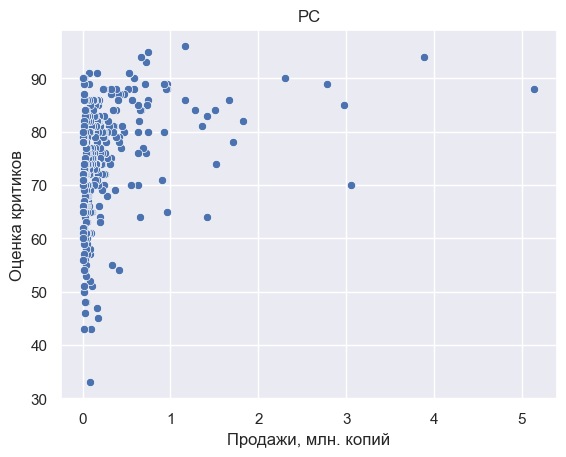

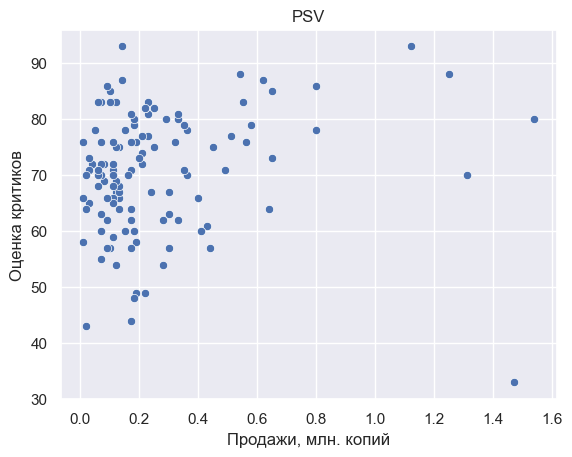

**1. PS3:**

- мы видим скопления в районе продаж от 0 до 5 млн копий с оценкой от 4 до 8 от игроков. При этом коэффициент корреляции равен 0.01, что указывает на очень слабую связь между оценкой игроков и продажами на данной платформе

**2. X360:**

- здесь скопления начинают образовываться от 0 до 2 млн копий с оценкой от 5 до 8 - причем чаще скопление продаж на оценке 7. Коэффициент корреялции равен 0.03, что также указывает на очень слабую связь между продажами и оценкой.

**3. 3DS:**

- скопление продаж от 0 до 1,8 млн копий, при этом оценка с наибольшей кучностью - 8. Коэффициент корреляции равен 0.23, что свидетельствует о средне-слабой связи между переменными.

**4. PS4:**

- скопление продаж от 0 до 3 млн копий, при этом чаще встречаются оценки 6 и 7. Коэффициент корреляции равен -0.03, что говорит о средне-слабой противоположной связи (продажи изменяются противоположно изменению оценок от игроков).

**5. WiiU:**

- небольшое скопление наблюдаем на диаграмме в районе продаж от 0.1 до 1.1 млн. копий с оценкой от игроков 8. Коэффициент корреляции равен 0.40 - средне слабая связь

**6. XOne:**

- скопление на диаграмме в районе продаж от 0.1 до 1.5 млн. копий с оценкой от игроков 5, 6, 7. Коэффициент корреляции равен -0.08 - очень слабая противоположная связь.

**7. PC:**

- скопление на диаграмме в районе продаж от 0.1 до 0.8 млн. копий с оценкой от критиков 8. Коэффициент корреляции равен -0.04 - очень слабая противоположная связь.

**8. PSV:**

- скопление в районе продаж от 0.1 до 0.2 млн. копий с оценкой от игроков 7, 8. Коэффициент корреляции равен 0.007, что указывает на очень слабую связь между переменными.

**Для оценкок игроков:**

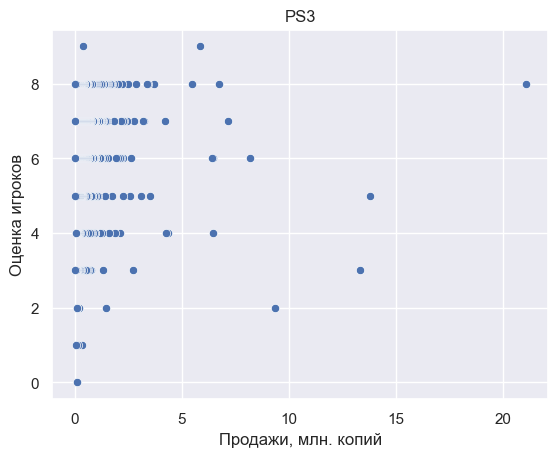

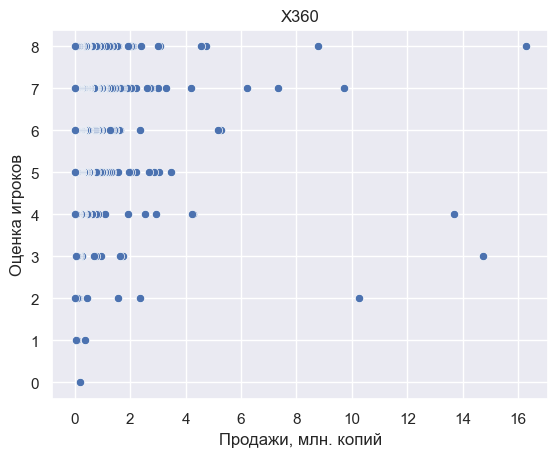

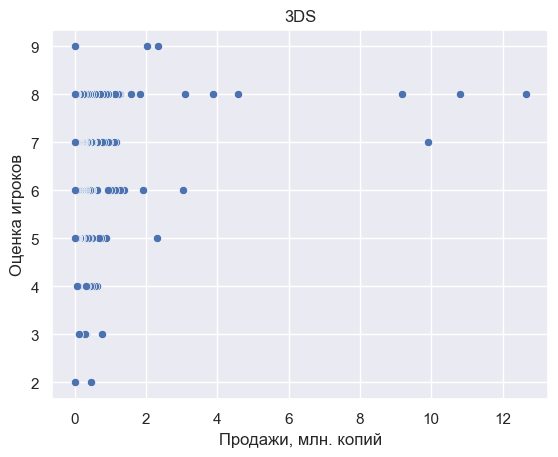

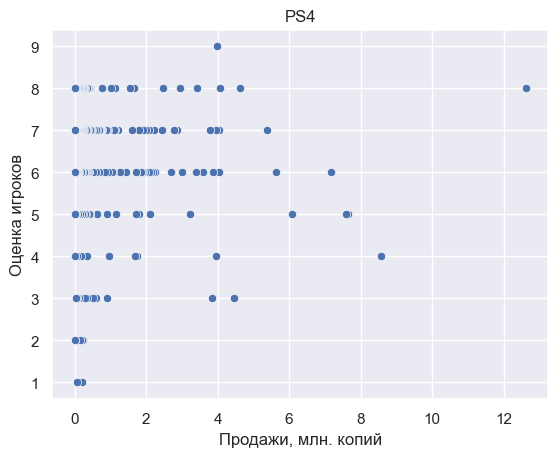

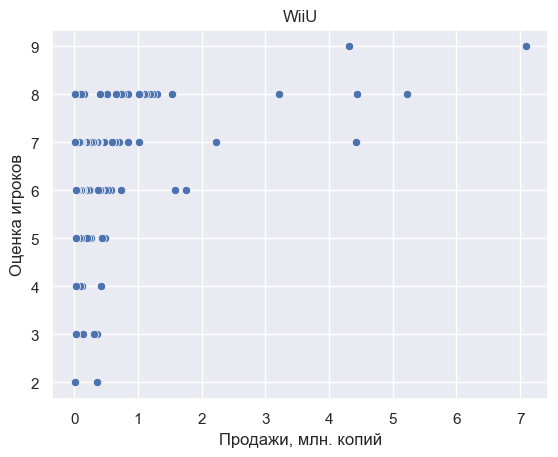

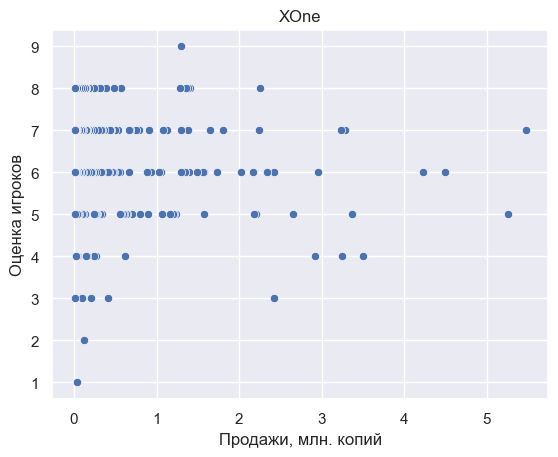

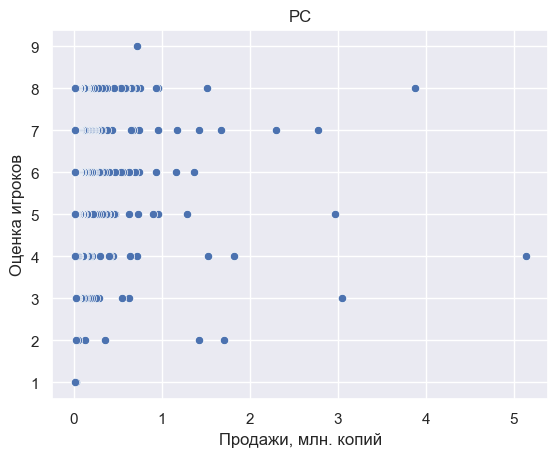

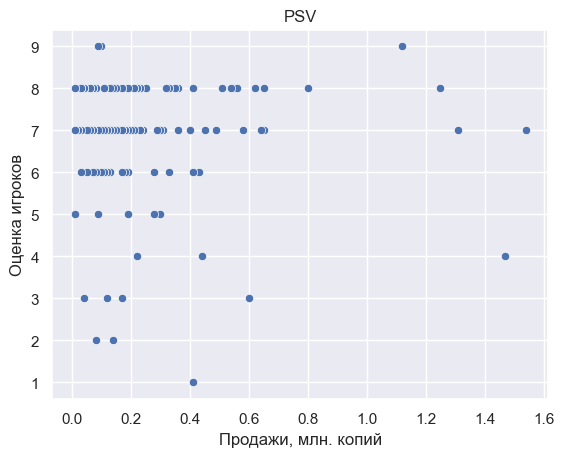

**1. PS3:**

- мы видим скопления в районе продаж от 0 до 5 млн копий с оценкой от 4 до 8 от игроков. При этом коэффициент корреляции равен 0.01, что указывает на очень слабую связь между оценкой игроков и продажами на данной платформе

**2. X360:**

- здесь скопления начинают образовываться от 0 до 2 млн копий с оценкой от 5 до 8 - причем чаще скопление продаж на оценке 7. Коэффициент корреялции равен 0.03, что также указывает на очень слабую связь между продажами и оценкой.

**3. 3DS:**

- скопление продаж от 0 до 1,8 млн копий, при этом оценка с наибольшей кучностью - 8. Коэффициент корреляции равен 0.23, что свидетельствует о средне-слабой связи между переменными.

**4. PS4:**

- скопление продаж от 0 до 3 млн копий, при этом чаще встречаются оценки 6 и 7. Коэффициент корреляции равен -0.03, что говорит о средне-слабой противоположной связи (продажи изменяются противоположно изменению оценок от игроков).

**5. WiiU:**

- небольшое скопление наблюдаем на диаграмме в районе продаж от 0.1 до 1.1 млн. копий с оценкой от игроков 8. Коэффициент корреляции равен 0.40 - средне слабая связь

**6. XOne:**

- скопление на диаграмме в районе продаж от 0.1 до 1.5 млн. копий с оценкой от игроков 5, 6, 7. Коэффициент корреляции равен -0.08 - очень слабая противоположная связь.

**7. PC:**

- скопление на диаграмме в районе продаж от 0.1 до 0.8 млн. копий с оценкой от критиков 8. Коэффициент корреляции равен -0.04 - очень слабая противоположная связь.

**8. PSV:**

- скопление в районе продаж от 0.1 до 0.2 млн. копий с оценкой от игроков 7, 8. Коэффициент корреляции равен 0.007, что указывает на очень слабую связь между переменными.

**6. Распределение игр по жанрам**

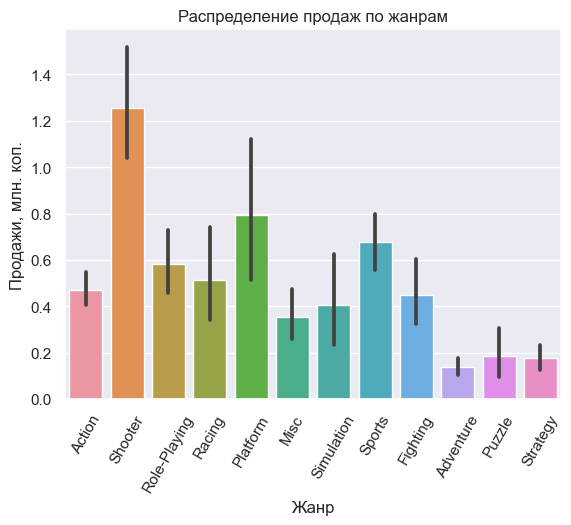

На данной диаграмме можно увидеть, что жанр с самыми низкими продажами на платфрормах:
- жанр Adventure, с общим объемом 0.17 млн. копий, 

а самые продаваемые жанры: 
- Sports - 0.7 млн.копий;
- Platform - 0.8 млн.копий;
- Shooter - 1.22 млн.копий.

### 6.3 Портрет пользователей

Напомним классификацию рейтинга ESRB:

- **«EC» («Early childhood»)** — «Для детей младшего возраста». Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими.
- **«E» («Everyone»)** — «Для всех». Содержание вполне подходит для всех возрастов (ранее с 6 лет). Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. 
- **«E10+» («Everyone 10 and older»)** — «Для всех от 10 лет и старше». Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. 
- **«T» («Teen»)** — «Подросткам». Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики. 
- **«M» («Mature»)** — «Для взрослых». Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику. 
- **«AO» («Adults Only 18+»)** — «Только для взрослых». Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое. 
- **«RP» («Rating Pending»)** — «Рейтинг ожидается». Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу. 

**Регион NA**

Для анализа мы также использовали продажи с 00 по 2010-е годы.

Рейтинг топ-5 платформ в Северной Америке по продажам (млн. копий):
1. X360 - 226.80 - 29.84%
2. PS3 - 168.26 - 22.14%
3. PS4 - 108.74 - 14.31%
4. XOne - 93.12 - 12.25%
5. Nintendo 3DS - 82.65 - 10.87%

Топ жанров по продажам в Северной Америке:
1. Action - 211.66 - 27.85%
2. Shooter - 193.27 - 25.43%
3. Sports - 101.27 - 13.32%
4. Role-Playing - 79.38 - 10.44%
5. Misc - 43.97 - 5.79%

**Продажи по возрастному рейтингу:**

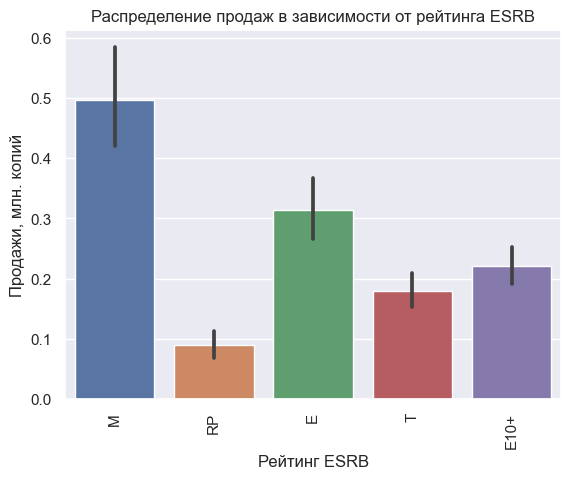

Согласно рейтингу ESRB самое большое количество проданных копий относится к играм рейтинга M - Mature "Для взрослых" - продано целых 0.5 млн копий. На втором месте Е - Everyone "Для всех" - 0.32 млн копий.
Можно сказать, что целевая аудитория Северной Америки - это подростки от 17 лет.

**Регион EU**

Рейтинг топ-5 платформ в Европе по продажам (млн. копий):
1. PS3 - 163.09 - 25.93%
2. PS4 - 141.09 - 26.59%
3. X360 - 117.10 - 13.98%
4. Nintendo 3DS - 61.27 - 12.03%
5. PC - 56.70 - 6.07%

Топ жанров по продажам в Европе:
1. Action - 187.45 - 29.80%
2. Shooter - 147.74 - 23.49%
3. Sports - 82.92 - 13.18%
4. Role-Playing - 60.12 - 9.56%
5. Racing - 39.58 - 6.29%

**Продажи по возрастному рейтингу:**

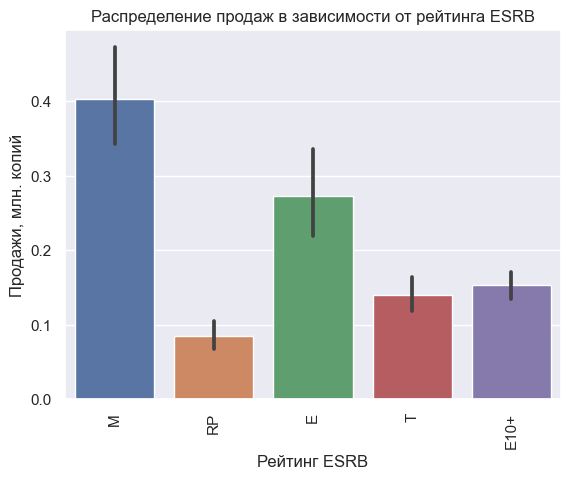

И как в Северной Америке, в Европе преобладают продажи игр с рейтингом M - Mature "Для взрослых" - 17+ - около 0.4 млн копий. На втором месте - Everyone "Для всех".

Тоже можно сказать, что целевая аудитория Европы - люди от 17 лет и люди разных возрастов.

**Регион JP**

А вот здесь уже интересней. В Японии в приставки XboX и на персональных компьютерах практически не играют, а педпочитают отечественное производство)))

Рейтинг топ-5 платформ в Японии по продажам (млн. копий):
1. Nintendo 3DS - 100.62 - 49.20%
2. PS3 - 49.39 - 24.15%
3. PSV - 21.84 - 10.68%
4. PS4 - 15.96 - 7.80%
5. Nintendo WiiU - 13.01 - 6.36%

Топ жанров по продажам в Японии:
1. Role-Playing - 65.13 - 31.85%
2. Action - 56.44 - 27.60%
3. Misc - 11.97 - 5.85%
4. Shooter - 11.92 - 5.83%
5. Simulation - 11.38 - 5.56%

**Продажи по возрастному рейтингу:**

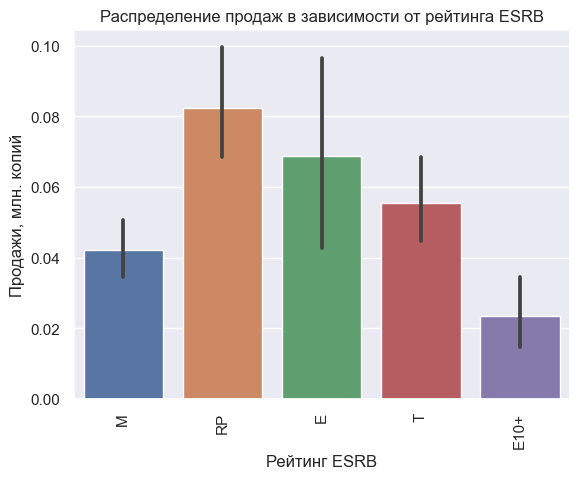

Здесь уже очень много игр с рейтингом RP - Rating Pending "Рейтинг ожидается".

Это может быть связано с тем, что в Японии сертификацией возрастного рейтинга игр в основном занимается другая компания -  Computer Entertainment Rating Organization (CERO):

- A (All Ages) — для всех возрастов;
- B (Ages 12 and up) — от 12 лет и старше;
- C (Ages 15 and up) — от 15 лет и старше;
- D (Ages 17 and up) — от 17 лет и старше;
- Z (Ages 18 and up) — только для взрослых.

Поэтому точно сказать, какая целевая аудитория в Японии - трудно, но зато мы знаем, что за все время там продалось около 0.046 млн копий игр в рейтинге "Для всех", 0.04 и 0.038 млн копий в рейтингах "Для взрослых" 17+ и "Подросткам" 13+ соотвественно.

### 6.4 Проверка гипотез

#### 6.4.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

В рамках проверки данной гипотезы мы провели двувыборочный двусторонний тест для двух независимых выборок с помощью метода ```ttest_ind``` из библиотеки scipy.stats. **Главное:**
- мы определили следующие гипотезы:
    - Ho: средний рейтинг игроков Xbox One равен среднему рейтингу игроков PC;
    - H1: средние рейтинги не равны друг другу.
- мы использовали аргумент **equal_var = False**, т.к. не уверены, что дисперсии двух выборок равны
- мы определили пороговое значение alpha = **0.05**, т.к. тест двусторонний
- мы очистили выборки от значений "заглушек" (-1).

Результаты:

Мы получили p-value = 0.3598729457215013. Это **больше** чем значение alpha = 0.05 (и даже больше, чем 0.01), поэтому **мы не можем отвергнуть нулевую гипотезу** о том, что средние рейтинги игроков двух платформ равны друг другу **в пользу альтернативной**.

#### 6.4.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

В рамках проверки данной гипотезы мы провели двувыборочный двусторонний тест для двух независимых выборок с помощью метода ```ttest_ind``` из библиотеки scipy.stats. **Главное:**
- мы определили следующие гипотезы:
    - H0 - средние пользовательские рейтинги двух жанров равны
    - H1 - средние пользовательские рейтинги двух жанров не равны
- мы использовали аргумент **equal_var = False**, т.к. не уверены, что дисперсии двух выборок равны
- мы определили пороговое значение alpha = **0.05**, т.к. тест двусторонний
- мы очистили выборки от значений "заглушек" (-1).

Результаты:

Мы получили p-value = 1.347842907289002e-18. Это **меньше** чем значение alpha = 0.05 (и даже меньше, чем 0.01), поэтому **мы отвергаем нулевую гипотезу о равенстве пользовательских рейтингов в пользу альтернативной**.